# MIE451/1513 Decision Support System -- Data Science Solution

## Be sure to let us know:
i. what location you chose (and remember to sign up on Piazza so there are no duplicates),

ii. what preprocessing steps you implemented



1.   i. Niagara-on-the-lake

2.   ii. truncate to max 100 reviews per hotel, drop hotels with < 20 reviews


There were no blank reviews

In [1]:
# check the current python version
import sys
print(sys.version)

#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Packages
import math
import pandas as pd
import numpy as np

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk

## Download Resources
nltk.download("vader_lexicon")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")

from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger
from nltk.data import find

## Machine Learning
import sklearn
import sklearn.metrics as metrics

## Data Visualization
import folium
from tabulate import tabulate
from scipy.stats.kde import gaussian_kde

## Geolocation
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 500)

In [3]:
# Use vader to evaluated sentiment of reviews
def evalSentences(sentences, to_df=False, columns=[]):
    #Instantiate an instance to access SentimentIntensityAnalyzer class
    sid = SentimentIntensityAnalyzer()
    pdlist = []
    if to_df:
        for sentence in tqdm(sentences):
            ss = sid.polarity_scores(sentence)
            pdlist.append([sentence]+[ss['compound']])
        reviewDf = pd.DataFrame(pdlist)
        reviewDf.columns = columns
        return reviewDf
    
    else:
        for sentence in tqdm(sentences):
            print(sentence)
            ss = sid.polarity_scores(sentence)
            for k in sorted(ss):
                print('{0}: {1}, '.format(k, ss[k]), end='')
            print()

In [4]:
#Read in from pandas
columnNames = ['filePath','hotelName','reviewColumn','ratingScore','groundTruth',
               'date_stamp','streetAddress', 'City',
               'Province','postalCode']

hotelDf = pd.read_csv('https://raw.githubusercontent.com/MIE451-1513-2020/assignment-ds-itazap/master/trip-advisor-crawler/reviews_niagara.csv?token=AHTKMHOUHAGC5AUCQCVQZSS7XKHZE',
                          header=None, names=columnNames)

#clean and get average ratings
hotels = hotelDf.hotelName.unique()
hotel_vader = {}
hotel_ground_truth = {}
for hotel in hotels:
  hotel_count = hotelDf.loc[hotelDf['hotelName'] == hotel].count()[0]
  if hotel_count < 20:
    hotelDf = hotelDf.loc[hotelDf['hotelName'] != hotel]
    print(hotel)


reviews = hotelDf['reviewColumn'].values

reviewDF = evalSentences(reviews, to_df=True, columns=['reviewCol','vader'])

Scarlet Tunic Bed and Breakfast
The Byron House
The Tea Cosy Bed and Breakfast
Wishing Well Historic Cottage
Barker House Bed and Breakfast
Lulu&#39;s Bed &amp; Breakfast
Rye Park Manor
Alfred&#39;s Coach House
TwiningRetreat
Heritage Trail Luxury Cottage &amp; Garden Retreat
Niagara On The Lake Furnished Rentals And Suites
Vine Village Apartments
Aaron&#39;s Bed
The Grange at Stag Hollow
The Stocking House Bed and Breakfast
Blue Willow Bed and Breakfast
Sterling House Bed and Breakfast
Beau&#39;s Bungalow
House29 Bed + Breakfast
A La Gallarie Bed and Breakfast
Wellington House B&amp;B
Villa Flora Bed
Le Papillon
Luisa&#39;s Suite Retreat
Royal Manor Bed and Breakfast


  0%|          | 0/6774 [00:00<?, ?it/s]

Country Side B&amp;B
Arbour View B&amp;B
Ben Brae-on-the-Park
Under the Arbour Bed and Breakfast
The Loyalist Bed &amp; Breakfast
Fawlty Towers B&amp;B
The Coach Stop
Vineyard Villa Bed &amp; Breakfast
Brock Hollow B&amp;B
DownHome Bed and Breakfast
Historic Locust Grove Canada Bed &amp; Breakfast
Cobblestone Bed and Breakfast


100%|██████████| 6774/6774 [00:09<00:00, 740.61it/s]


#Q1 a)

In [5]:
#clean and get average ratings
hotels = hotelDf.hotelName.unique()
hotel_vader = {}
hotel_ground_truth = {}
for hotel in hotels:
  hotel_count = hotelDf.loc[hotelDf['hotelName'] == hotel].count()[0]
  reviews = hotelDf.loc[hotelDf['hotelName'] == hotel]['reviewColumn'].values
  eval = evalSentences(reviews, to_df=True, columns=['reviewCol','vader'])
  vader_avg = eval['vader'].mean()
  hotel_vader[hotel] = vader_avg
  hotel_ground_truth[hotel] = hotelDf.loc[hotelDf['hotelName'] == hotel].ratingScore.mean() / 5

100%|██████████| 75/75 [00:00<00:00, 683.68it/s]


In [457]:
hotel_vader
import operator

#Q1 b) i) & ii)

##Ranked Vader

In [460]:
sorted_hotel_vader = sorted(hotel_vader.items(), key=operator.itemgetter(1), reverse=True)
sorted_hotel_vader

[('Old Town Country Landing B&amp;B', 0.9817433333333334),
 ('Arcadia House B&amp;B', 0.9738999999999999),
 ('Bruce Manor', 0.9736225),
 ('Kellar House Accommodations', 0.9703724137931037),
 ('Cape House Bed and Breakfast', 0.9688990000000001),
 ('Blue Skies Bed &amp; Breakfast', 0.9684888888888886),
 ('A Lil Bit Of Eden', 0.9679600000000003),
 ('Woodbourne Inn', 0.967813),
 ('In Elegance Bed and Breakfast', 0.967743),
 ('Chalet Bed and Breakfast', 0.9658328767123289),
 ('Historic Wilson-Guy House', 0.9657140350877194),
 ('Darlington House Bed and Breakfast', 0.965418),
 ('The White House Boutique Bed &amp; Breakfast', 0.9640139999999998),
 ('The Stewart House', 0.9632350000000001),
 ('Yolanta&#39;s B&amp;B', 0.9616851851851853),
 ('Two Bees Bed &amp; Breakfast', 0.9616630000000004),
 ('Orchid Inn', 0.9614565656565656),
 ('Serendipity Bed &amp; Breakfast', 0.9614150000000002),
 ('Globetrotters Bed and Breakfast', 0.9607557377049181),
 ('Matisse Bed &amp; Breakfast', 0.9607142857142857)

##Ranked Ground Truth

In [461]:
sorted_hotel_ground_truth = sorted(hotel_ground_truth.items(), key=operator.itemgetter(1), reverse=True)
sorted_hotel_ground_truth

[('The White House Boutique Bed &amp; Breakfast', 1.0),
 ('Lakelands Bed and Breakfast', 1.0),
 ('Post House Inn', 1.0),
 ('Explorer House Bed &amp; Breakfast', 1.0),
 ('Brockamour Manor Bed and Breakfast', 1.0),
 ('On the 6 Bed and Breakfast', 1.0),
 ('Old Town Country Landing B&amp;B', 1.0),
 ('Greenview Manor, Luxury Bed &amp; Breakfast', 0.998),
 ('Victoria Gables Bed &amp; Breakfast', 0.998),
 ('Graystone Bed and Breakfast', 0.998),
 ('Hoppy&#39;s Bed &amp; Breakfast', 0.998),
 ('Serendipity Bed &amp; Breakfast', 0.998),
 ('Globetrotters Bed and Breakfast', 0.9967213114754099),
 ('Abacot Hall Bed &amp; Breakfast', 0.9960000000000001),
 ('Blue Skies Bed &amp; Breakfast', 0.9950617283950617),
 ('The Promenade', 0.9944444444444445),
 ('Matisse Bed &amp; Breakfast', 0.9942857142857143),
 ('Wine Country Bed &amp; Breakfast', 0.994),
 ('A Lil Bit Of Eden', 0.9933333333333334),
 ('Arcadia House B&amp;B', 0.9933333333333334),
 ('St. Andrews House Bed &amp; Breakfast', 0.9923076923076923),

In [8]:
def prettyprint(dict_list):
  for x in dict_list:
    print(x[0], ":", x[1])
  print("")

In [9]:
print("====== Top 5 ======\n")
print("------ Vader ------")
prettyprint(sorted_hotel_vader[:5])
print("------ Ground Truth ------")
prettyprint(sorted_hotel_ground_truth[:5])
print("====== Bottom 5 ======\n")
print("------ Vader ------")
prettyprint(sorted_hotel_vader[-5:])
print("------ Ground Truth ------")
prettyprint(sorted_hotel_ground_truth[-5:])

====== Top 5 ======

------ Vader ------
Old Town Country Landing B&amp;B : 0.9817433333333334
Arcadia House B&amp;B : 0.9738999999999999
Bruce Manor : 0.9736225
Kellar House Accommodations : 0.9703724137931037
Cape House Bed and Breakfast : 0.9688990000000001

------ Ground Truth ------
The White House Boutique Bed &amp; Breakfast : 1.0
Lakelands Bed and Breakfast : 1.0
Post House Inn : 1.0
Explorer House Bed &amp; Breakfast : 1.0
Brockamour Manor Bed and Breakfast : 1.0

====== Bottom 5 ======

------ Vader ------
South Landing Inn : 0.7165280000000002
The Old Bank House : 0.6993081967213115
King George III Inn : 0.599592
Residence &amp; Conference Centres - Niagara on the Lake : 0.5701072727272727
Great Blue Resorts - Vine Ridge Resort Niagara : 0.5597645161290322

------ Ground Truth ------
A Pillow and Toast : 0.792
Riverbend Inn and Vineyard : 0.774
King George III Inn : 0.704
Great Blue Resorts - Vine Ridge Resort Niagara : 0.6709677419354839
Residence &amp; Conference Centres -

The ground truth and vader report completely different top 5 hotels. But, upon reviewing the ground truth score for the top 5 vader score hotels, I can see that these top 5 hotels are still extremelty highly rated (98% +) so I think there are just a lot of well-rated hotels:


Old Town Country Landing B&amp;B : 1.0

Arcadia House B&amp;B : 0.9933

Bruce Manor : 0.9875

Kellar House Accommodations : 0.9897

Cape House Bed and Breakfast : 0.9880


The bottom 5 however have more similarities. Vader included 4 out of 5 worst hotels correclty, just in a different order.


I think these results are due to there being a lot of well rated hotels so the ranking may have been off even though the scores were similar. For the worse hotels there aren't many so there is a larger variance in the bottom 5. This makes the bottom 5 easier to rank

#Q2 a)

In [10]:
def get_stop_words():
    stop = set(stopwords.words('english'))
    #Add possible Stop Words for Hotel Reviews
    stop.add('hotel')
    stop.add('room')
    stop.add('rooms')
    stop.add('stay')
    stop.add('staff')
    return stop

def getTopKWords(df, kwords):

    stop = get_stop_words()
    counter = Counter()

    reviews = df['reviewCol'].values

    for review in reviews:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(kwords)
    return topk

# Note: You may want to use an NLTK tokenizer instead of a regular expression in the following
def dataFrameTransformation(hotelDf, reviewDF, topk):
    reviews = reviewDF['reviewCol'].values
    print(len(reviews))
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter([word.lower() for word in re.findall(r'\w+',reviews[i])])
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldfx = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return finaldfx

def getTopK(df, kwords, label_value, label_column='groundTruth', operation=operator.eq, value_column='reviewCol'):
    stop = get_stop_words()
    counter = Counter()
    reviews = df.loc[operation(df[label_column],label_value)][value_column]
    for review in reviews:
          counter.update([word.lower() 
                          for word 
                          in re.findall(r'\w+', review) 
                          if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(kwords)
    return topk

In [11]:
hotelDf = hotelDf.reset_index()
reviewDF = reviewDF.reset_index()

##i) positive reviews

In [12]:
#We are only intereseted in this three column for overall analysis
topk = getTopKWords(reviewDF, 500)
finaldf = dataFrameTransformation(hotelDf, reviewDF, topk)
itemAnalysisDf = finaldf[['reviewCol','groundTruth','vader']]
topkGroundPos = getTopK(itemAnalysisDf, 50, label_value='positive')
topkGroundPos

6774


[('breakfast', 4800),
 ('great', 3164),
 ('niagara', 2441),
 ('stayed', 2318),
 ('comfortable', 2252),
 ('lake', 2113),
 ('clean', 2075),
 ('wonderful', 2001),
 ('would', 1989),
 ('hosts', 1877),
 ('time', 1872),
 ('home', 1858),
 ('place', 1854),
 ('beautiful', 1814),
 ('area', 1730),
 ('house', 1676),
 ('back', 1665),
 ('bed', 1639),
 ('well', 1628),
 ('delicious', 1620),
 ('lovely', 1558),
 ('location', 1511),
 ('one', 1494),
 ('nice', 1460),
 ('breakfasts', 1451),
 ('made', 1422),
 ('recommend', 1416),
 ('friendly', 1355),
 ('perfect', 1309),
 ('amazing', 1260),
 ('also', 1250),
 ('definitely', 1231),
 ('town', 1202),
 ('day', 1163),
 ('good', 1152),
 ('wine', 1138),
 ('nthe', 1134),
 ('everything', 1114),
 ('inn', 1114),
 ('visit', 1104),
 ('walk', 1095),
 ('like', 1088),
 ('enjoyed', 1084),
 ('food', 1050),
 ('two', 1036),
 ('excellent', 1028),
 ('night', 1022),
 ('experience', 1019),
 ('morning', 1004),
 ('first', 947)]

##ii) negative reviews

In [13]:
topkGroundNeg = getTopK(itemAnalysisDf, 50, label_value='negative')
topkGroundNeg

[('would', 289),
 ('one', 266),
 ('breakfast', 250),
 ('night', 193),
 ('time', 163),
 ('bed', 149),
 ('good', 149),
 ('place', 143),
 ('nice', 140),
 ('could', 137),
 ('like', 133),
 ('stayed', 129),
 ('niagara', 127),
 ('nthe', 126),
 ('inn', 126),
 ('small', 124),
 ('get', 120),
 ('two', 117),
 ('great', 113),
 ('area', 106),
 ('back', 106),
 ('told', 101),
 ('service', 99),
 ('also', 98),
 ('clean', 96),
 ('bathroom', 95),
 ('location', 95),
 ('desk', 95),
 ('price', 93),
 ('day', 90),
 ('lake', 90),
 ('food', 89),
 ('booked', 89),
 ('front', 88),
 ('even', 85),
 ('old', 84),
 ('well', 82),
 ('never', 82),
 ('u2019t', 82),
 ('first', 80),
 ('much', 79),
 ('went', 78),
 ('experience', 78),
 ('door', 77),
 ('little', 77),
 ('morning', 76),
 ('next', 74),
 ('left', 72),
 ('said', 72),
 ('got', 72)]

The word "Niagara" is location specific

words in both lists:

In [14]:
for (word,count) in topkGroundPos:
  for (word1, count1) in topkGroundNeg:
    if word == word1:
      print(word)

breakfast
great
niagara
stayed
lake
clean
would
time
place
area
back
bed
well
location
one
nice
also
day
good
nthe
inn
like
food
two
night
experience
morning
first


"Niagara" is location specific.


Above are the words that appear in both lists. Most seem to be pretty non-descriptive or nouns that could have been described positively or negatively (if they had a negation) so that makes sense. Some surprising ones are "nice", "good", and  "clean" because they seem all positive, but they still makes sense because they could have been used with a negation: "not clean, not nice, etc."

#Q2 b)

In [15]:
# This grammar is described in the paper by S. N. Kim,
# T. Baldwin, and M.-Y. Kan.
# Evaluating n-gram based evaluation metrics for automatic
# keyphrase extraction.
# Technical report, University of Melbourne, Melbourne 2010.
grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""

# to make the results more useable, we clean up the tree results shown above. 
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()
stopword_list = get_stop_words()

# generator, create item one a time
def get_terms(tree):
    for leaf in leaves(tree):
        term = [normalise(w) for w,t in leaf if acceptable_word(w) ]
        # Phrase only
        if len(term)>1:
            yield term

# generator, generate leaves one by one
def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='RB'):
        yield subtree.leaves()

# stemming, lematizing, lower case... 
def normalise(word,lemmatizer=lemmatizer, stemmer=stemmer):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = stemmer.stem(word)
    word = lemmatizer.lemmatize(word)
    return word

# stop-words and length control
def acceptable_word(word, stopword_list=stopword_list):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 40
        and word.lower() not in stopword_list)
    return accepted

# Flatten phrase lists to get tokens for analysis
def flatten_phrase_lists(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        finalList.append(token.rstrip())
    return finalList

def getTopKNP(df, kNPs, label_value):

    counter = Counter()
    df = df.loc[df['groundTruth'] == label_value]
    reviews = df['reviewCol'].values

    for review in reviews:
            counter.update(flatten_phrase_lists([word
                            for word 
                            in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                            ]))
    topk = counter.most_common(kNPs)
    return topk


def NPdataFrameTransformation(hotelDf, reviewDF, topk):
    reviews = reviewDF['reviewCol'].values
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter(flatten_phrase_lists([word 
                                       for word 
                                       in get_terms(chunker.parse(pos_tag(re.findall(r'\w+',reviews[i]))))]))
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldfx = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return finaldfx

In [16]:
# Sample text
text = """The Buddha, the Godhead, resides quite as comfortably in the circuits of a digital
computer or the gears of a cycle transmission as he does at the top of a mountain
or in the petals of a flower. To think otherwise is to demean the Buddha...which is
to demean oneself."""
# Part of Speech Tagging
# Google: https://en.wikipedia.org/wiki/Part-of-speech_tagging
tagger = PerceptronTagger()
pos_tag = tagger.tag
taggedToks = pos_tag(re.findall(r'\w+', text))
taggedToks

# Create phrase tree
chunker = nltk.RegexpParser(grammar)
tree = chunker.parse(taggedToks)

##ii) positive 

In [17]:
topk_phrase = getTopKNP(finaldf, 50, label_value='positive') 
topk_phrase[:50]

[('main street', 266),
 ('first time', 211),
 ('wonder host', 205),
 ('niagara fall', 194),
 ('minut walk', 180),
 ('short walk', 177),
 ('shaw festiv', 173),
 ('delici breakfast', 170),
 ('hot tub', 153),
 ('great place', 135),
 ('next year', 126),
 ('next time', 118),
 ('graciou host', 116),
 ('great locat', 116),
 ('comfort bed', 111),
 ('front desk', 106),
 ('great host', 104),
 ('great time', 100),
 ('wine tour', 94),
 ('queen street', 90),
 ('cours breakfast', 90),
 ('short drive', 85),
 ('wonder experi', 85),
 ('second floor', 76),
 ('perfect host', 76),
 ('perfect place', 74),
 ('orchid inn', 74),
 ('great experi', 71),
 ('next visit', 70),
 ('excel host', 70),
 ('wine tast', 70),
 ('fresh fruit', 68),
 ('wonder time', 67),
 ('warm welcom', 67),
 ('minut drive', 66),
 ('next morn', 66),
 ('wine countri', 64),
 ('common area', 64),
 ('great breakfast', 64),
 ('beauti home', 63),
 ('local wineri', 62),
 ('first experi', 62),
 ('victoria gabl', 62),
 ('lake ontario', 60),
 ('mani 

##ii) negative

In [18]:
bottomk_phrase = getTopKNP(finaldf, 50, label_value='negative') 
bottomk_phrase[:50]

[('front desk', 39),
 ('second floor', 16),
 ('niagara fall', 13),
 ('next morn', 11),
 ('first time', 10),
 ('great locat', 10),
 ('main street', 10),
 ('oban inn', 10),
 ('next day', 10),
 ('first night', 9),
 ('park lot', 9),
 ('hot tub', 9),
 ('common area', 8),
 ('shaw festiv', 8),
 ('vintag hotel', 8),
 ('first floor', 8),
 ('hot water', 7),
 ('shaw club', 7),
 ('credit card', 7),
 ('moffat inn', 7),
 ('new owner', 7),
 ('custom servic', 6),
 ('book com', 6),
 ('mani year', 6),
 ('nice touch', 6),
 ('nice place', 6),
 ('front door', 5),
 ('second night', 5),
 ('confirm email', 5),
 ('sever year', 5),
 ('good locat', 5),
 ('doubl bed', 5),
 ('good size', 5),
 ('queen bed', 5),
 ('bathroom door', 5),
 ('medic suppli', 5),
 ('littl bit', 4),
 ('first morn', 4),
 ('confirm number', 4),
 ('last night', 4),
 ('long weekend', 4),
 ('last minut', 4),
 ('good place', 4),
 ('earli check', 4),
 ('good thing', 4),
 ('queen land', 4),
 ('minut walk', 4),
 ('comfort bed', 4),
 ('great experi',

phrases in both lists:

In [19]:
for (word,count) in topk_phrase:
  for (word1, count1) in bottomk_phrase:
    if word == word1:
      print(word)

main street
first time
niagara fall
minut walk
shaw festiv
hot tub
great locat
comfort bed
front desk
second floor
great experi
next morn
common area


I did not expec to see "second floor" in the positive list. I guess since the town is in cottage country near wineries and a lake, it is in reference to a lot of B&B hotels. B&B's are often just residential homes with a few rooms to rent out so I guess the second floor of a home would be reserved for that.



The phrases above appear in both lists. I'm surprised to see great location and great experience but i guess there could be a negation (not term) in the negative reviews. I was also suprised to see "shaw festiv" because i wasn't sure what that meant. Upon research I learned there's a local festival called "Shaw Festival" that I guess came up in a lot of reviews. It might be there because people might be visiting the town just to attend the festival so its important to review it.

In [20]:
def NPdataFrameTransformation(hotelDf, reviewDF, topk):
    reviews = reviewDF['reviewCol'].values
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter(flatten_phrase_lists([word 
                                       for word 
                                       in get_terms(chunker.parse(pos_tag(re.findall(r'\w+',reviews[i]))))]))
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return finaldf

In [21]:
finaldf_phrase = NPdataFrameTransformation(hotelDf, reviewDF, topk_phrase)

#Q2 c)

In [204]:
grammar2c = """
  NBAR:
    {<DT>?<NN|NNS>*<VB|VBD>*<RB>*?<JJ|NN.*>}
  NP:
    {<NBAR>}
    {<NBAR><IN><NBAR>}
"""
# Sample text
text = """meal was not very good. no rooms were extremely great. there were no locks. the front desk was nice"""
# Part of Speech Tagging
# Google: https://en.wikipedia.org/wiki/Part-of-speech_tagging
tagger = PerceptronTagger()
pos_tag = tagger.tag
taggedToks = pos_tag(re.findall(r'\w+', text))
print(taggedToks)
chunker = nltk.RegexpParser(grammar2c)
tree = chunker.parse(taggedToks)
print(chunker)
print(tree)

[('meal', 'NN'), ('was', 'VBD'), ('not', 'RB'), ('very', 'RB'), ('good', 'JJ'), ('no', 'DT'), ('rooms', 'NNS'), ('were', 'VBD'), ('extremely', 'RB'), ('great', 'JJ'), ('there', 'EX'), ('were', 'VBD'), ('no', 'DT'), ('locks', 'NNS'), ('the', 'DT'), ('front', 'NN'), ('desk', 'NN'), ('was', 'VBD'), ('nice', 'JJ')]
chunk.RegexpParser with 2 stages:
RegexpChunkParser with 1 rules:
       <ChunkRule: '<DT>?<NN|NNS>*<VB|VBD>*<RB>*?<JJ|NN.*>'>
RegexpChunkParser with 2 rules:
       <ChunkRule: '<NBAR>'>
       <ChunkRule: '<NBAR><IN><NBAR>'>
(S
  (NP (NBAR meal/NN was/VBD not/RB very/RB good/JJ))
  (NP (NBAR no/DT rooms/NNS were/VBD extremely/RB great/JJ))
  there/EX
  were/VBD
  (NP (NBAR no/DT locks/NNS))
  (NP (NBAR the/DT front/NN desk/NN was/VBD nice/JJ)))


##i) positive reviews

In [205]:
topk_phrase_2c = getTopKNP(finaldf, 50, label_value='positive') 
topk_phrase_2c[:50]

[('breakfast delici', 232),
 ('bed comfort', 188),
 ('minut walk', 184),
 ('feel welcom', 136),
 ('everi morn', 123),
 ('make sure', 89),
 ('front desk', 83),
 ('cours breakfast', 79),
 ('golf cours', 72),
 ('gourmet breakfast', 72),
 ('wine tast', 65),
 ('minut drive', 56),
 ('made sure', 55),
 ('wine tour', 53),
 ('anoth coupl', 51),
 ('front porch', 51),
 ('say enough', 50),
 ('spotlessli clean', 49),
 ('breakfast excel', 49),
 ('locat perfect', 47),
 ('extrem comfort', 47),
 ('extrem clean', 47),
 ('breakfast great', 46),
 ('coffe maker', 46),
 ('everi year', 46),
 ('realli nice', 46),
 ('everi day', 44),
 ('feel comfort', 44),
 ('back next', 43),
 ('host friendli', 41),
 ('extrem help', 40),
 ('year old', 39),
 ('food delici', 39),
 ('visit niagara', 38),
 ('breakfast tabl', 38),
 ('breakfast wonder', 37),
 ('min walk', 37),
 ('weekend getaway', 36),
 ('food great', 35),
 ('everi time', 33),
 ('breakfast good', 33),
 ('absolut delici', 33),
 ('wed anniversari', 33),
 ('bike ride',

##ii) negative reviews

In [207]:
bottomk_phrase_2c = getTopKNP(finaldf, 50, label_value='negative') 
bottomk_phrase_2c[:50]

[('front desk', 39),
 ('bed comfort', 11),
 ('park lot', 11),
 ('custom servic', 10),
 ('credit card', 9),
 ('noth special', 6),
 ('brand new', 5),
 ('bed uncomfort', 5),
 ('make sure', 5),
 ('hair dryer', 5),
 ('locat great', 5),
 ('everi year', 4),
 ('confirm number', 4),
 ('coffe maker', 4),
 ('visit niagara', 4),
 ('everi day', 4),
 ('food good', 4),
 ('confirm email', 4),
 ('everi time', 4),
 ('musti smell', 4),
 ('fruit cup', 4),
 ('hear peopl', 4),
 ('bathroom door', 4),
 ('child play', 4),
 ('night sleep', 3),
 ('toilet paper', 3),
 ('book com', 3),
 ('extrem loud', 3),
 ('tv work', 3),
 ('golf club', 3),
 ('water pressur', 3),
 ('absolut beauti', 3),
 ('extrem small', 3),
 ('minut walk', 3),
 ('ice bucket', 3),
 ('water stain', 3),
 ('star experi', 3),
 ('anoth coupl', 3),
 ('wineri tour', 3),
 ('quit good', 3),
 ('car park', 3),
 ('day earli', 3),
 ('lobbi area', 3),
 ('ice machin', 3),
 ('wed anniversari', 3),
 ('plastic tube', 3),
 ('window open', 3),
 ('inch high', 3),
 ('

In [208]:
c = []
og = []
for (word,count) in topk_phrase_2c:
  c.append(word)
for (word1, count1) in topk_phrase:
  og.append(word1)

for word in c:
  if word not in og:
    print(word)

breakfast delici
bed comfort
feel welcom
everi morn
make sure
made sure
anoth coupl
front porch
say enough
spotlessli clean
breakfast excel
locat perfect
extrem comfort
extrem clean
breakfast great
coffe maker
everi year
realli nice
everi day
feel comfort
back next
host friendli
extrem help
year old
food delici
visit niagara
breakfast tabl
breakfast wonder
min walk
weekend getaway
food great
everi time
breakfast good
absolut delici
wed anniversari
bike ride
everi detail
downtown niagara
king bed
bedroom suit
mini fridg
park lot


In [209]:
for word in og:
  if word not in c:
    print(word)

main street
first time
wonder host
niagara fall
short walk
shaw festiv
delici breakfast
hot tub
great place
next year
next time
graciou host
great locat
comfort bed
great host
great time
queen street
short drive
wonder experi
second floor
perfect host
perfect place
orchid inn
great experi
next visit
excel host
fresh fruit
wonder time
warm welcom
next morn
wine countri
common area
great breakfast
beauti home
local wineri
first experi
victoria gabl
lake ontario
mani wineri
amaz breakfast
finlay hous
wonder place


In [211]:
for word in og:
  if word in c:
    print(word)

minut walk
front desk
wine tour
cours breakfast
wine tast
minut drive
golf cours
gourmet breakfast


I used a grammar rule that captured more noun-adjective phrases, and more desriptive words in the negative reviews.


1.   Similarity: both captured the 8 phrases above that happened to be some of the most common phrases in both my grammar list and the provided one. This is good because these are really common noun phrases and were captured in both grammar rules. My grammar rule seems to capture similar noun phrases as the original one in addition to others.


2.   Difference: My grammar rule captured noun-adjective terms, not just adjective-noun terms like the provided rule. For example, "breakfast wonderful" was captured using my grammar rule but only "wonderful breakfast" would have been captured in the provided one.


3.   Difference: my grammar rule captured more negative phrases for the bottom reviews such as "musty smell" and "bed uncomfrtable." I found that the original grammar rule didn't have any phrases in the bottom reviews that were clearly negative.



I think my grammar pattern is more effective because the the negative phrases seem to be more unique to negative reviews. I also think this grammar pattern captures what the original one did + more so it should still hold the most frequent terms as the original. It had phrases with strong adjectives that represent the sentiment of the review more strongly.

#Q3 a)

In [27]:
# get Top K mutual information terms from the dataframe
def getMI(topk, df, label_column='groundTruth'):
    miScore = []
    for word in topk:
        miScore.append([word[0]]+[metrics.mutual_info_score(df[label_column], df[word[0]])])
    miScoredf = pd.DataFrame(miScore).sort_values(1,ascending=0)
    miScoredf.columns = ['Word','MI Score']
    return miScoredf

In [28]:
#@title Default title text
miScoredf = getMI(topk, finaldf)
miScoredf[:50]

,Word,MI Score
340,told,0.014722
266,price,0.013877
12,hosts,0.011898
20,delicious,0.010516
100,small,0.008875
228,desk,0.007905
9,wonderful,0.007674
280,however,0.007145
17,one,0.007104
38,night,0.007037


In [29]:
miScoredf[:5]

,Word,MI Score
340,told,0.014722
266,price,0.013877
12,hosts,0.011898
20,delicious,0.010516
100,small,0.008875


A lot of these make sense. The top 5 are reprinted above. I was surprised to see "told" at the top but the more I thought about it the more it describes communication, likely with staff either good or bad. I still don't think it's a very "sentimental" word, but I can see how it could be used by reviewers when describing conversations with hotel staff. People often compare their experience to the "price" they paid so that makes sense to come up. Since there were so many B&B's, it  was expected to see "hosts" and "delicisou" because you normally interact with B&B hosts a lot more compared to hotel staff. At B&Bs you usually have a provided breakfast so that explains the word "delicious." Finally, since you rent a room in a hotel, the word "small" makes sense because the size of the room is one of the first things you notice.

#Q3 b)

In [219]:
finaldf_phrase_2c = NPdataFrameTransformation(hotelDf, reviewDF, topk_phrase_2c)
miScoredf_phrase = getMI(topk_phrase_2c, finaldf_phrase_2c)
miScoredf_phrase[:50]

,Word,MI Score
6,front desk,4.598335e-03
0,breakfast delici,1.435689e-03
49,park lot,1.264790e-03
3,feel welcom,1.134177e-03
7,cours breakfast,6.608491e-04
9,gourmet breakfast,5.935635e-04
4,everi morn,5.928188e-04
2,minut walk,5.038449e-04
12,made sure,4.424727e-04
16,say enough,4.173313e-04


#Disclaimer

The majority of reviews are positive, so the data is very skewed. The top MI phrases are as a result mainly positive. I will answer this question by analyzing theese positive phrases as indicators of what hotels should continute to do or invest even more resources in to remain well-reviewed. I printed the number of negative vs positive review counts below

In [232]:
print('negative reviews:', len(finaldf_phrase_2c.loc[finaldf_phrase_2c['groundTruth'] == 'negative'].index))
print('positive reviews:', len(finaldf_phrase_2c.loc[finaldf_phrase_2c['groundTruth'] == 'positive'].index))

negative reviews: 371
positive reviews: 6403


The top phrases made a lot more sense. The top #1 phrase "Front Desk" is definitely something I personally consider as important to my visit anywhere. If the front desk staff are rude it is very noticeable and frustrating, but if they are nice they can be very helpful and give unique recommendations. Since a lot of hotels in Niagara-on-the-lake are B&Bs it makes sense to see NINE phrases relating to food taste because B&Bs often provide breakfasts. It can be a nice addition that people seek out explicitly when booking a hotel. Since Niagara-on-the-lake is a small town in wine country, guests likely drive up, so "park lot" is an important feature to consider. There were also a few phrases about room cleanliness which is obvious why it's importnat.

Some phrases like "wine tour" and "golf course" indicate that although they are part of the town and not individual hotels, hotels can often help guests find out about these local attractions and make arrangemnets.

Another interesting observation were phrases like "made sure" "every detail" "extremly helpful" and "every time" that I think are great examples of describing above and beyond service. Along with the physical parts of a hotel, such as food and parking, the hosts are also exteremly important. Like the front desk, hosts are very prominant in B&Bs as they are usually owners of the house and communicate with the guests much more than a busy city hotel. These phrases indicate that guests notice when a host "makes sure" the guest is receiving good service "ever time" and paying attention to "every detail."

Based on this list I think hotels in this town should continue to focus on:

1.   providing fresh breakfast
2.   room cleanliness
3.   high-standard communication with guests (recommendatins, details, etc.)
4.   information on local attractions such as wine tours and golf courses



#Q4 a)

In [274]:
# Simple example of getting pointwise mutual information of a term
def demo_pmiCal(df,word):
    pmilist=[]
    N = df.shape[0]
    for sentiment in ['positive','negative']:
        for word_present in [False,True]:
            px = sum(df['groundTruth']==sentiment)
            py = sum(df[word]==word_present)
            pxy = len(df[(df['groundTruth']==sentiment) & (df[word]==word_present)])

            if pxy==0:#Log 0 cannot happen
                pmi = math.log((pxy+0.0001)*N/(px*py))
            else:
                pmi = math.log(pxy*N/(px*py))

            pmilist.append([sentiment]+[word_present]+[px]+[py]+[pxy]+[pmi])

    # assemble the results into a dataframe
    pmidf = pd.DataFrame(pmilist)
    pmidf.columns = ['sentiment (x)','word_present (y)','px','py','pxy','pmi']
    return pmidf
# Compute PMI for all terms and all possible labels
def pmiForAllCal(df, topk_word, gt_sentiment, label_column='groundTruth'):
    #Try calculate all the pmi for top k and store them into one pmidf dataframe
    
    index = [x[0] for x in topk_word]
    pmiDf = pd.DataFrame(index=index, columns=['pmi'])

    for (word, count) in tqdm(topk_word):
        pmiDf.at[word, 'pmi'] = pmiCalc(df,word,gt_sentiment,label_column)
    
    return pmiDf


def pmiCalc(df, word, gt_sentiment, label_column='groundTruth'):
    
    N = df.shape[0]
    
    px = sum(df[label_column]==gt_sentiment)
    py = sum(df[word]==True)
    pxy = len(df[(df[label_column]==gt_sentiment) & (df[word]==True)])
    if px == 0 or py == 0:
      print('there are no negative reviews')
      pmi = 99
    elif pxy==0:#Log 0 cannot happen
        pmi = math.log((pxy+0.0001)*N/(px*py))
    else:
        pmi = math.log(pxy*N/(px*py))
    return pmi

##i) positive

In [264]:
pmiposdf = pmiForAllCal(finaldf,topk,'positive')
#Sorted top pmi words for positive reviews
pmiposdf.sort_values('pmi',ascending=0).head(50)

100%|██████████| 500/500 [00:02<00:00, 175.93it/s]


,pmi
chef,0.0563251
donna,0.0563251
maria,0.0563251
blocks,0.0563251
sandra,0.0563251
spotless,0.0563251
welcomed,0.0563251
beautifully,0.0540022
gracious,0.0534224
immaculate,0.0521843


##ii) negative

In [36]:
#Sorted top pmi words for negative reviews
pminegdf = pmiForAllCal(finaldf,topk,'negative')
pminegdf.sort_values('pmi',ascending=0).head(50)

100%|██████████| 500/500 [00:02<00:00, 245.92it/s]


,pmi
told,2.03889
price,1.80182
said,1.66104
less,1.54066
however,1.52291
desk,1.51426
reservation,1.48326
given,1.47214
air,1.45166
asked,1.40293




1.   For positive reviews, some top PMI words were names, such as "Maria, donna, sandra, john" likely host names. This is interesting because it probably means that really good hosts were memorable by name and worth mentioning in reviews.
2.   I noticed that the negative reviews had a lot of emphasized descriptive adjectives. For example, postivie reviews had "immaculate, beautifully, luxurious, memorable, gourmet, perfect, homemade, gracious, fantastic" while negative reviews only had a few negative adjectives, like "disappointed." Negative review words had more verbs that seem to be describing bad interactions, such as "still, got, expect, never, nothing, asked." It is important to note that the data is skewed in favor of positive reviews so there are less words to choose from
3. Positive review words had more words about location than negative reviews. For example, pos reviews had "shopping, bikes, attractions" but neg reviews didn't mention such things.



#Q4 b)

In [237]:
# Simple example of getting pointwise mutual information of a term

def demo_pmiCal(df,word):
    pmilist=[]
    N = df.shape[0]
    for sentiment in ['positive','negative']:
        for word_present in [False,True]:
            px = sum(df['groundTruth']==sentiment)
            py = sum(df[word]==word_present)
            pxy = len(df[(df['groundTruth']==sentiment) & (df[word]==word_present)])

            if pxy==0:#Log 0 cannot happen
                pmi = math.log((pxy+0.0001)*N/(px*py))
            else:
                pmi = math.log(pxy*N/(px*py))

            pmilist.append([sentiment]+[word_present]+[px]+[py]+[pxy]+[pmi])

    # assemble the results into a dataframe
    pmidf = pd.DataFrame(pmilist)
    pmidf.columns = ['sentiment (x)','word_present (y)','px','py','pxy','pmi']
    return pmidf

##i) positive

In [233]:
pminegdf_phrase = pmiForAllCal(finaldf_phrase_2c,topk_phrase_2c,'positive')
pminegdf_phrase.sort_values('pmi',ascending=0).head(50)

100%|██████████| 50/50 [00:00<00:00, 233.85it/s]


,pmi
breakfast wonder,0.0563251
gourmet breakfast,0.0563251
min walk,0.0563251
locat perfect,0.0563251
extrem clean,0.0563251
made sure,0.0563251
breakfast great,0.0563251
everi detail,0.0563251
bike ride,0.0563251
spotlessli clean,0.0563251


##ii) negative

In [235]:
pminegdf_phrase = pmiForAllCal(finaldf_phrase_2c,topk_phrase_2c,'negative')
pminegdf_phrase.sort_values('pmi',ascending=0).head(50)

100%|██████████| 50/50 [00:00<00:00, 257.89it/s]


,pmi
front desk,1.67519
park lot,1.54367
everi time,0.70742
visit niagara,0.55327
everi day,0.440792
wed anniversari,0.419738
everi year,0.399119
coffe maker,0.378916
bedroom suit,0.101285
anoth coupl,0.0520135


In [238]:
demo_pmiCal(finaldf_phrase_2c, 'front desk')

,sentiment (x),word_present (y),px,py,pxy,pmi
0,positive,False,6403,6668,6328,0.003989
1,positive,True,6403,106,75,-0.289626
2,negative,False,371,6668,340,-0.071485
3,negative,True,371,106,31,1.675193


In [239]:
demo_pmiCal(finaldf_phrase_2c, 'park lot')

,sentiment (x),word_present (y),px,py,pxy,pmi
0,positive,False,6403,6735,6374,0.001235
1,positive,True,6403,39,29,-0.239941
2,negative,False,371,6735,361,-0.021550
3,negative,True,371,39,10,1.543668




1.   "front desk" appeared at the top of the negative reviews list but at the bottom of another. Upon further analysis, I saw that when 'front desk' was present, the pmi was highest thatn the 3 other scenarios above, meaning it was indicative of a negative review. This means that the front desk being rude can really make a negative experience, but if the experience was positive, it doesn't necessarily tell you much. This i sinteresting because 'front desk' appeared a lot in the topk words analysis but its actually not equally indicative in positive and negative reviews.
2.   "park lot" also had a high pmi in negative reviews which makes sense because if you have problems parking or with car theft etc, your trip can be ruined. But if the parking service is there, it deson't really mean you automtically have a great trip.
3. In general, the top pmi phrases list had a lot more high pmi words whereas the bottom list has a lot fo negative words. I think this, again, attributes to the fact that the data is skewed and has much more positive reviews so the analysis has a larger corpus for positive reviews and therefore is more accurate and can pull out these pmi values.



#Q4 c)

##Top Hotel

In [246]:
hotelDf_top = hotelDf.loc[hotelDf['hotelName']=='The White House Boutique Bed &amp; Breakfast'].reset_index()
reviews_top = hotelDf_top['reviewColumn'].values
reviewDF_top = evalSentences(reviews_top, to_df=True, columns=['reviewCol','vader']).reset_index()

100%|██████████| 100/100 [00:00<00:00, 772.27it/s]


In [248]:
topk_top = getTopKWords(reviewDF_top, 500)
finaldf_top = dataFrameTransformation(hotelDf_top, reviewDF_top, topk_top)

100


In [261]:
top_pmi_df = pmiForAllCal(finaldf_top,topk_top,'positive')
#Sorted top pmi words for positive reviews
top_pmi_df.sort_values('pmi',ascending=0).head(50)

100%|██████████| 500/500 [00:00<00:00, 794.26it/s]


,pmi
sonny,0
drive,0
warmth,0
everyone,0
early,0
detail,0
attention,0
catered,0
shopping,0
nthey,0


In [275]:
top_pmi_df = pmiForAllCal(finaldf_top,topk_top,'negative')
#Sorted top pmi words for positive reviews
top_pmi_df.sort_values('pmi',ascending=0).head(50)

 40%|████      | 201/500 [00:00<00:00, 674.17it/s]

there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are 

 69%|██████▉   | 347/500 [00:00<00:00, 699.54it/s]

there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are 

100%|██████████| 500/500 [00:00<00:00, 697.67it/s]

there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are 

,pmi
sonny,99
drive,99
warmth,99
everyone,99
early,99
detail,99
attention,99
catered,99
shopping,99
nthey,99


This hotel has no negative reviews. Therefore, this analysis is not useful because all pmi values for positive reviews are 0 since there are no negative reviews in the data to even compare to. This means any word or phrase is always in a positive review so you can't comment on how positive it is or how negative it is. All phrases have only one option for sentiment, positive.

In [276]:
topk_phrase_4 = getTopKNP(finaldf_top, 50, label_value='positive') 
finaldf_phrase_4 = NPdataFrameTransformation(hotelDf_top, reviewDF_top, topk_phrase_4)
pminegdf_phrase_4 = pmiForAllCal(finaldf_phrase_4,topk_phrase_4,'positive')
pminegdf_phrase_4.sort_values('pmi',ascending=0).head(50)

100%|██████████| 50/50 [00:00<00:00, 720.21it/s]


,pmi
host sonni,0
restaur wineri,0
walk distanc,0
town center breakfast,0
wife eleanor,0
breakfast big,0
extrem hospit,0
gave suggest,0
morn highli,0
visit notl,0


In [277]:
pminegdf_phrase_4 = pmiForAllCal(finaldf_phrase_4,topk_phrase_4,'negative')
pminegdf_phrase_4.sort_values('pmi',ascending=0).head(50)

100%|██████████| 50/50 [00:00<00:00, 624.15it/s]

there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are no negative reviews
there are 

,pmi
host sonni,99
restaur wineri,99
walk distanc,99
town center breakfast,99
wife eleanor,99
breakfast big,99
extrem hospit,99
gave suggest,99
morn highli,99
visit notl,99


##**I set pmi = 99 if there is a division by 0**

This hotel has no negative reviews. Therefore, this analysis is not useful because all pmi values for positive reviews are 0 since there are no negative reviews in the data to even compare to. This means any word or phrase is always in a positive review so you can't comment on how positive it is or how negative it is.

##Worst Hotel - ground truth score of 0.65

In [278]:
hotelDf_top = hotelDf.loc[hotelDf['hotelName']=='Residence &amp; Conference Centres - Niagara on the Lake'].reset_index()
reviews_top = hotelDf_top['reviewColumn'].values
reviewDF_top = evalSentences(reviews_top, to_df=True, columns=['reviewCol','vader'])
topk_top = getTopKWords(reviewDF_top, 500)
finaldf_top = dataFrameTransformation(hotelDf_top, reviewDF_top, topk_top)

100%|██████████| 55/55 [00:00<00:00, 775.91it/s]

55


##i) positive

In [280]:
worse_pmiposdf = pmiForAllCal(finaldf_top,topk_top,'positive')
#Sorted top pmi words for positive reviews
worse_pmiposdf.sort_values('pmi',ascending=0).head(50)

100%|██████████| 500/500 [00:00<00:00, 794.03it/s]


,pmi
require,0.675129
able,0.675129
u002fshower,0.675129
hotels,0.675129
entire,0.675129
lovely,0.675129
includes,0.675129
greenhouse,0.675129
come,0.675129
agriculture,0.675129


##ii) negative

In [287]:
worse_pmiposdf = pmiForAllCal(finaldf_top,topk_top,'negative')
#Sorted top pmi words for positive reviews
worse_pmiposdf.sort_values('pmi',ascending=0).head(50)

100%|██████████| 500/500 [00:00<00:00, 842.22it/s]


,pmi
stuff,0.711496
seemed,0.711496
head,0.711496
however,0.711496
couple,0.711496
busy,0.711496
tightly,0.711496
old,0.711496
covered,0.711496
buffet,0.711496


This hotel still had an average ground truth score of 65% which means that there are still a lot of good reviews. This analysis was more useful here. i could see that the positive reviews discussed nouns like the "shower" and "greenhouse" while negative reviews mentioned "holes" "refund" and "bugs" so does provide a bit more insight on what could be going wrong in this hotel because there are actually an even-ish amount of reviews to gather data on.

In [285]:
topk_phrase_4 = getTopKNP(finaldf_top, 50, label_value='positive') 
finaldf_phrase_4 = NPdataFrameTransformation(hotelDf_top, reviewDF_top, topk_phrase_4)
pminegdf_phrase_4 = pmiForAllCal(finaldf_phrase_4,topk_phrase_4,'positive')
pminegdf_phrase_4.sort_values('pmi',ascending=0).head(50)


100%|██████████| 50/50 [00:00<00:00, 751.46it/s]


,pmi
firework place,0.675129
moment hesit,0.675129
downtown niagara,0.675129
say enough good,0.675129
pretti good,0.675129
fruit juic coffe,0.675129
clock nand,0.675129
wineri visit,0.675129
buy realli enjoy,0.675129
brew wine,0.675129


In [286]:

pminegdf_phrase_4 = pmiForAllCal(finaldf_phrase_4,topk_phrase_4,'negative')
pminegdf_phrase_4.sort_values('pmi',ascending=0).head(50)

100%|██████████| 50/50 [00:00<00:00, 791.87it/s]


,pmi
front desk,0.200671
bedroom suit,-0.674798
outlet mall,-0.674798
conveni nearbi,-8.49884
wineri also interest,-8.49884
minut drive,-8.49884
downtown niagara,-8.49884
say enough good,-8.49884
pretti good,-8.49884
fruit juic coffe,-8.49884


Again, the phrase analysis was more useful here. i could see that the positive reviews discussed nouns like the "firework place" and "computer desk chair" while negative reviews mentioned "front desk" so does provide a bit more insight on what could be going wrong in this hotel because there are actually an even ish amount of reviews to gather data on.


# Q5

**Note** Remember to save a static image of the map in the notebook

#Q a) i)

In [49]:
def getHistogram(df, measure, title,figsize=(10,5)):
    fig = plt.figure(figsize=figsize)
    plt.title(title)
    
    if measure=='both':
        x = [df['ratingScore'].values/5]
        y = [df['vader'].values]
        bins = np.linspace(-1, 1, 100)
        plt.hist(x, bins, label='normalized Ground Truth')
        plt.hist(y, bins, label='vader')
        plt.legend(loc='upper right')
        plt.xlabel("Value")
        plt.ylabel("Frequency")
    else:
        plt.hist(df[measure].values)

    plt.xlabel("Value")
    plt.ylabel("Frequency")

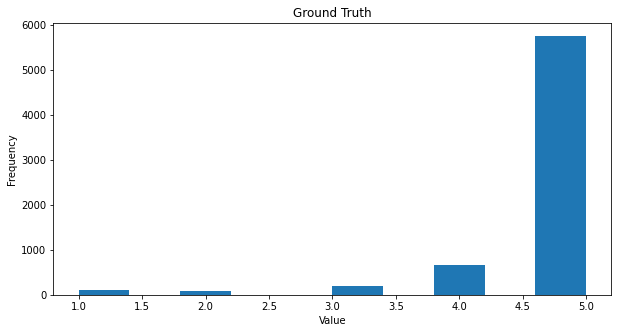

In [50]:
#what is the distrubution in ground truth scores like?
getHistogram(finaldf,'ratingScore', 'Ground Truth')

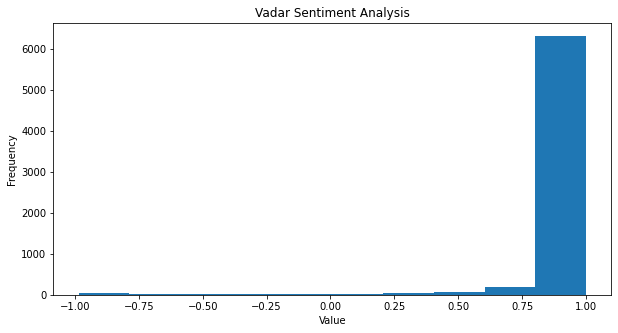

In [51]:
# what is the distrubtuion in vader scores like?
getHistogram(finaldf, 'vader', 'Vadar Sentiment Analysis')

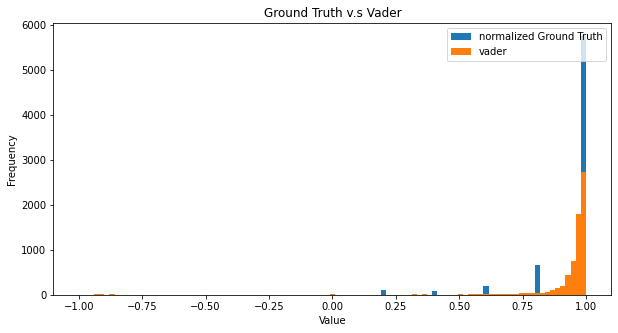

In [52]:
# how do the distrubutions compare between ground truth (normalized) and vader
getHistogram(finaldf, 'both', 'Ground Truth v.s Vader')

This explains a lot and is definitely very surprising. There are sooo many positive reviews so it helps me undestand some of my results in previous questions where skewed data affected my findings. I guess Niagara-on-the-lake just has great hotels and happy reviewers.

#Q5 a) ii)

In [291]:
hotelDf['count'] = 1

In [295]:
print(len(hotelDf.index))

6774


In [311]:
df_grouped = hotelDf.groupby(["hotelName"], as_index=False)["count"].count()

In [322]:
x=df_grouped['hotelName'].values
y=df_grouped['count'].values
print(y)
index = np.arange(len(x))

[100 100  30  25 100  50  30 100  90  30  38  25 100  81 100 100  80  42
 100 100  25  73  28  45 100  80  20  24 100 100  61  55 100  31  80 100
 100 100 100  57  70 100 100 100  58  25 100 100 100  35 100  20 100  20
  30 100  75  99  57 100 100  53 100  55 100  95 100 100  80  65  20  75
  26  45 100  20  48  25  45  61 100  36  89  20 100 100 100 100 100 100
 100 100 100  27]


In [343]:
def plot_bar_x():
    # this is for plotting purpose
    fig = plt.figure(figsize=(17, 7))
    index = np.arange(len(x))
    plt.bar(index, y)
    plt.xlabel('Hotel', fontsize=10)
    plt.ylabel('No of Reivews', fontsize=10)
    plt.xticks(index, x, fontsize=10, rotation=90)
    plt.title('Num Reivews per Hotel')
    plt.show()

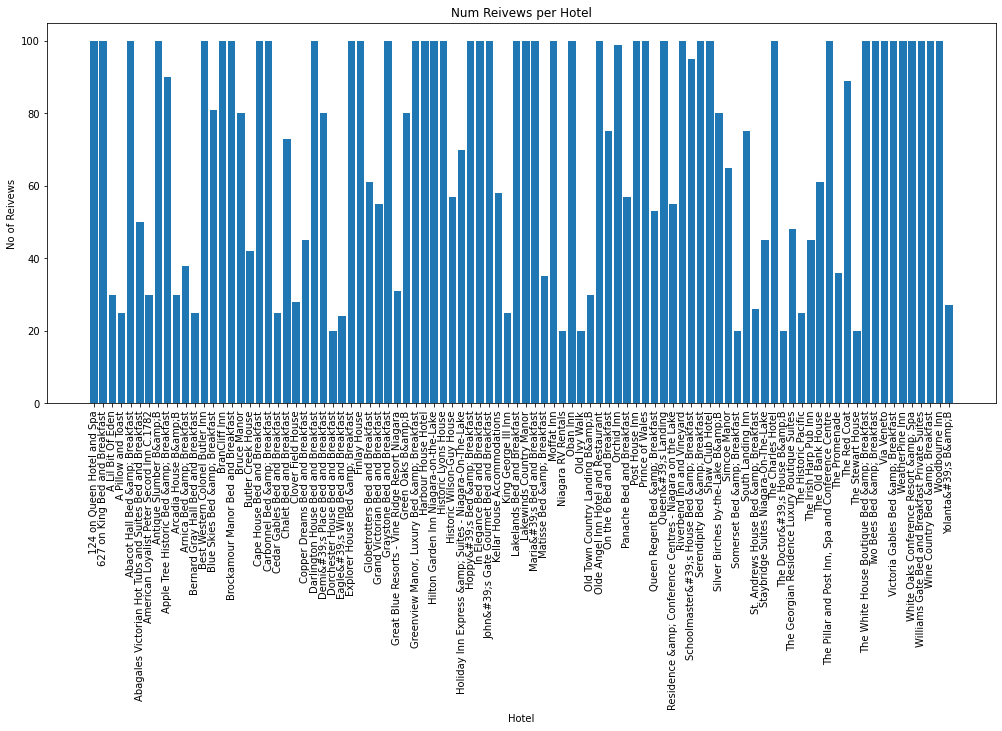

In [344]:
plot_bar_x()

There are not trends apparent. I only kepy hotels with > 20 reviews and capped the reviews at a max of 100. There is a range for the number of reviews.

#Q5 b) i)

In [56]:
def avg_rating_per_hotel(df):
  # average the scores over all hotels, you may need to provide additional filtering
  tempDf = df[['hotelName','vader','ratingScore','reviewCol']]
  tempDf.columns = ['hotelName','AverageVader', 'AverageRatingScore','n_reviews']
  tempDf = tempDf.groupby('hotelName').agg({'AverageVader':'mean', 'AverageRatingScore':'mean','n_reviews':'count'})
  return tempDf

In [57]:
avg_rating_df = avg_rating_per_hotel(finaldf)
avgRatingTop5 = avg_rating_df.reset_index(drop=False)\
                               .sort_values('AverageRatingScore',ascending=False)[['hotelName','AverageRatingScore']].head(5)
avgRatingTop5

,hotelName,AverageRatingScore
56,On the 6 Bed and Breakfast,5.0
84,The White House Boutique Bed &amp; Breakfast,5.0
59,Post House Inn,5.0
15,Brockamour Manor Bed and Breakfast,5.0
46,Lakelands Bed and Breakfast,5.0


In [58]:
avgVaderTop5 = avg_rating_df.reset_index(drop=False)\
                              .sort_values('AverageVader',ascending=False)[['hotelName','AverageVader']].head(5)
avgVaderTop5

,hotelName,AverageVader
54,Old Town Country Landing B&amp;B,0.981743
9,Arcadia House B&amp;B,0.973900
16,Bruce Manor,0.973622
44,Kellar House Accommodations,0.970372
18,Cape House Bed and Breakfast,0.968899


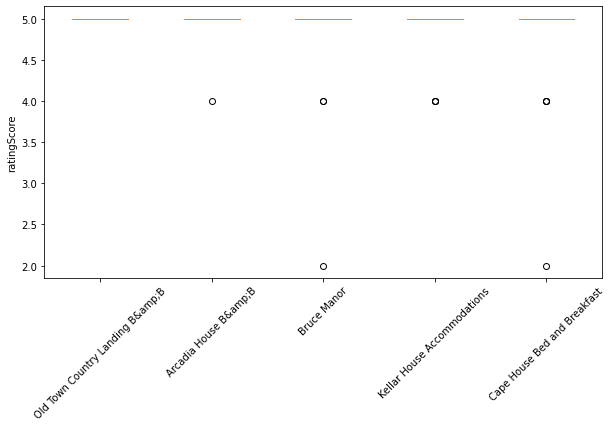

In [59]:
# how do the ratings compare for 5 hotels?
five_hotels = avgVaderTop5.hotelName.values

hotel_list = []
for hotel in five_hotels:
  _hotel = finaldf.loc[finaldf['hotelName'] == hotel]['ratingScore']
  hotel_list.append(_hotel)


# multiple box plots on one figure
plt.figure(figsize=(10,5))
plt.boxplot(hotel_list)
plt.xticks(np.arange(1,6), five_hotels,rotation=45)
plt.ylabel('ratingScore')
plt.show()

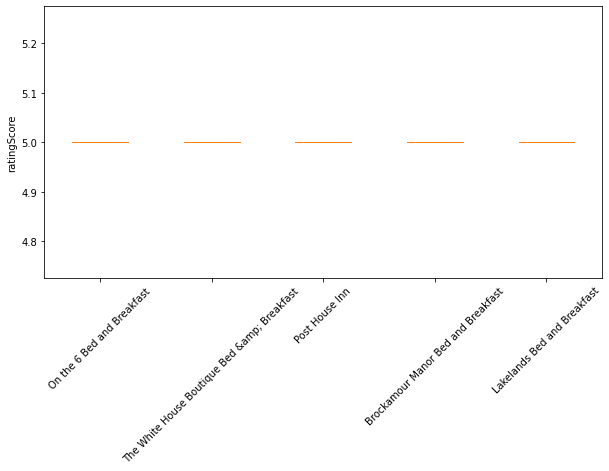

In [60]:
# how do the ratings compare for 5 hotels?
five_hotels = avgRatingTop5.hotelName.values

hotel_list = []
for hotel in five_hotels:
  _hotel = finaldf.loc[finaldf['hotelName'] == hotel]['ratingScore']
  hotel_list.append(_hotel)

# multiple box plots on one figure
plt.figure(figsize=(10,5))
plt.boxplot(hotel_list)
plt.xticks(np.arange(1,6), five_hotels,rotation=45)
plt.ylabel('ratingScore')
plt.show()

[Text(0, 0, 'On the 6 Bed and Breakfast'),
 Text(0, 0, 'The White House Boutique Bed &amp; Breakfast'),
 Text(0, 0, 'Post House Inn'),
 Text(0, 0, 'Brockamour Manor Bed and Breakfast'),
 Text(0, 0, 'Lakelands Bed and Breakfast')]

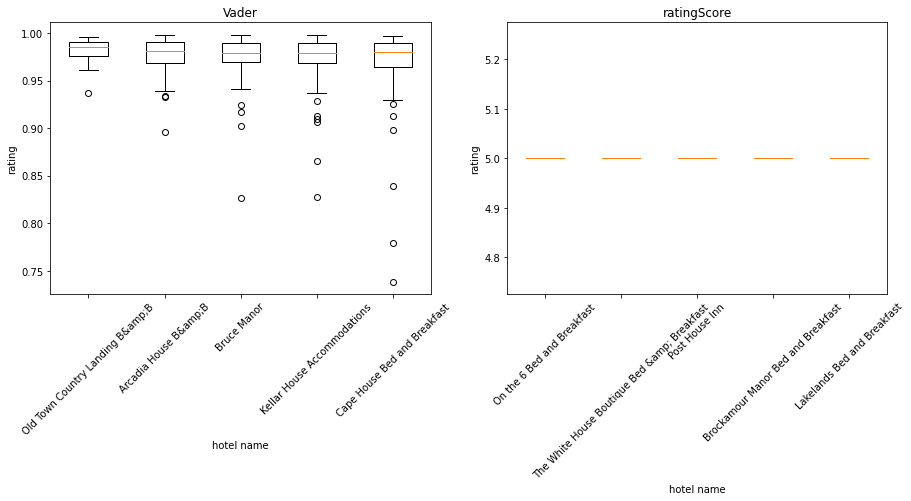

In [359]:
fig, ax = plt.subplots(1,2,figsize=(15,5),sharex=False,sharey=False)

# how do the ratings compare for 5 hotels?
five_hotels = avgVaderTop5.hotelName.values

hotel_list = []
for hotel in five_hotels:
  _hotel = finaldf.loc[finaldf['hotelName'] == hotel]['vader']
  hotel_list.append(_hotel)


# multiple box plots on one figure
ax[0].boxplot(hotel_list)
ax[0].set_title('Vader')
ax[0].set_ylabel('rating')
ax[0].set_xlabel('hotel name')
ax[0].set_xticklabels(five_hotels, fontdict=None, minor=False, rotation=45)

# how do the ratings compare for 5 hotels?
five_hotels = avgRatingTop5.hotelName.values

hotel_list = []
for hotel in five_hotels:
  _hotel = finaldf.loc[finaldf['hotelName'] == hotel]['ratingScore']
  hotel_list.append(_hotel)

ax[1].boxplot(hotel_list)
ax[1].set_title('ratingScore')
ax[1].set_ylabel('rating')
ax[1].set_xlabel('hotel name')
ax[1].set_xticklabels(five_hotels, fontdict=None, minor=False, rotation=45)
# multiple box plots on one figure


##Q5 b) ii)

In [61]:
avgRatingTop5.mean()

AverageRatingScore    5.0
dtype: float64

In [62]:
avgRatingTop5.var()

AverageRatingScore    0.0
dtype: float64

In [63]:
avgVaderTop5.mean()

AverageVader    0.973707
dtype: float64

In [64]:
avgVaderTop5.var()

AverageVader    0.000025
dtype: float64

##Q5 b) iii)

The mean and variance was more sufficient in this case because the top 5 hotels were nearly perfectly rated so there wasn't much variance that a boxplot would help visualize. The ground truth rating had 0 variance and the Vader rating had a 0.000025 variance so it's not necessarily helpful to visualize a boxplot but usually it is more useful

#Q5 c) i)

Text(0.5, 0, 'Vader Score')

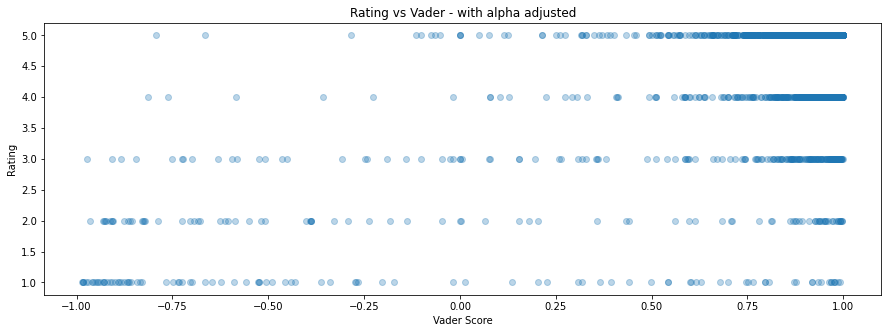

In [360]:
fig, ax = plt.subplots(1,1,figsize=(15,5),sharex=False,sharey=False)
rating_scores = finaldf['ratingScore'].values
vader_scores = finaldf['vader'].values
ax.plot(vader_scores, rating_scores,"o", alpha=0.3)

ax.set_title('Rating vs Vader - with alpha adjusted')

ax.set_ylabel('Rating')
ax.set_xlabel('Vader Score')

Text(0.5, 1.0, 'Rating vs Vader - heatmap')

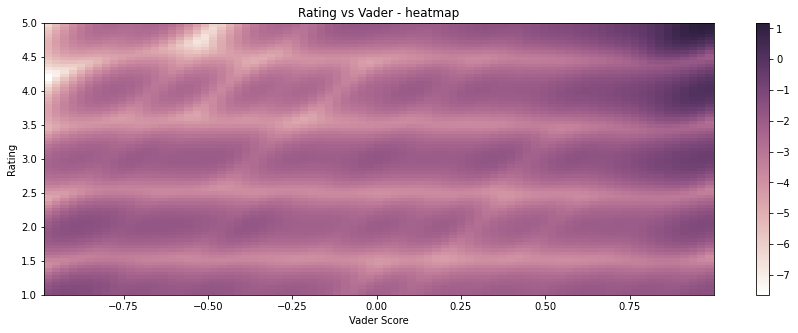

In [361]:
k = gaussian_kde(np.vstack([vader_scores, rating_scores]))
xi, yi = np.mgrid[vader_scores.min():vader_scores.max():vader_scores.size**0.5*1j,rating_scores.min():rating_scores.max():rating_scores.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, (ax1) = plt.subplots(1,1, figsize=(15,5))


b1 = ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(vader_scores.min(), vader_scores.max())
ax1.set_ylim(rating_scores.min(), rating_scores.max())

ax1.set_xlabel('Vader Score')
ax1.set_ylabel('Rating')

fig.colorbar(b1, ax=ax1)

ax1.set_title('Rating vs Vader - heatmap')

From the scatter plot, it appears that there is clustering in the 2 opposite corners, showing a cluster at poorly rated hotels and well-rated. This shows that the vader score did well in labelling similarly to the gorund truth. There are still a few hotels that vader didn't label 100% correctly but otherwise, it is well calibrated.

##Q5 c) ii)

In [67]:
finaldf['reviewLength'] = finaldf['reviewCol'].str.len()

Text(0.5, 0, 'Review Length')

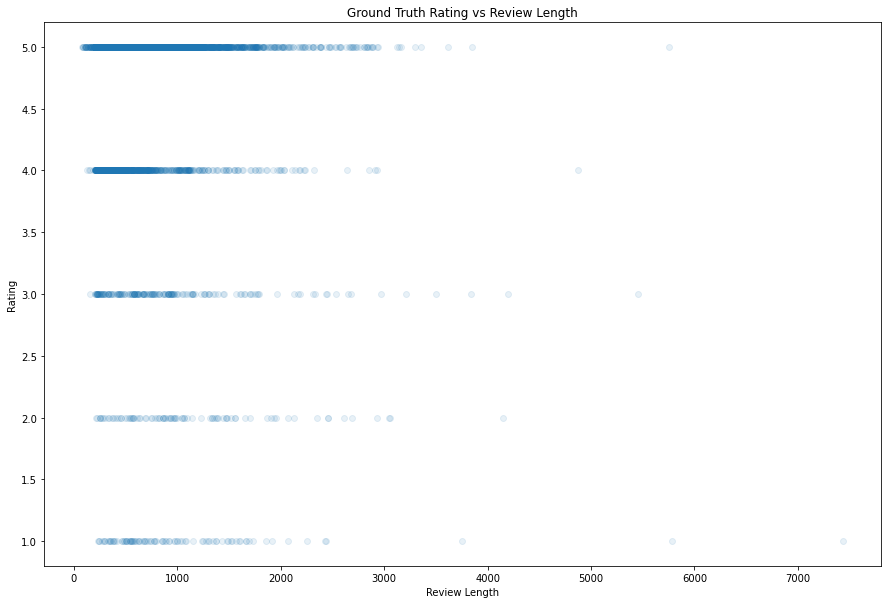

In [368]:
fig, ax = plt.subplots(1,1,figsize=(15,10),sharex=False,sharey=False)
rating_scores = finaldf['ratingScore'].values
reviewLength_scores = finaldf['reviewLength'].values
ax.plot(reviewLength_scores, rating_scores,"o", alpha=0.1)
ax.set_title('Ground Truth Rating vs Review Length')

ax.set_ylabel('Rating')
ax.set_xlabel('Review Length')

Text(0.5, 0, 'Review Length')

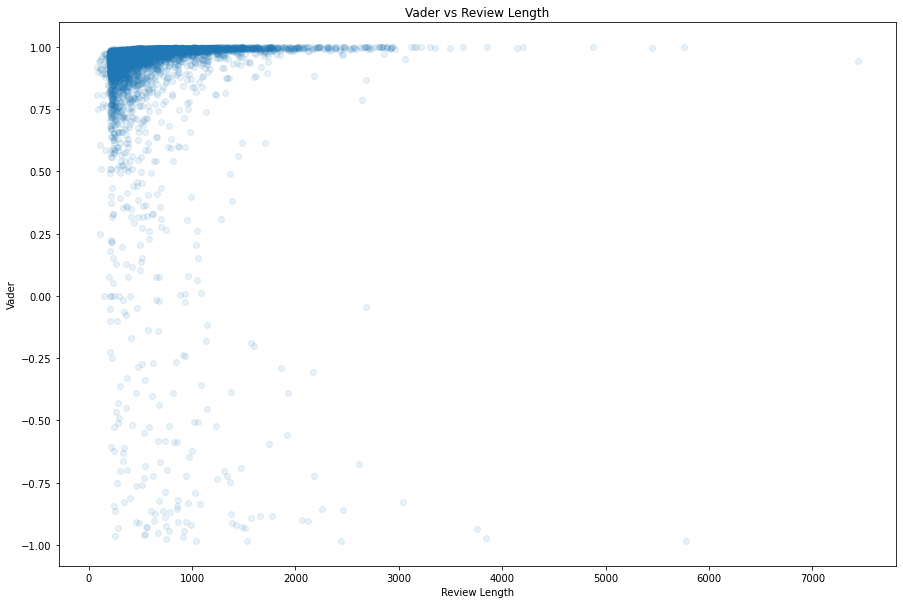

In [367]:
fig, ax = plt.subplots(1,1,figsize=(15,10),sharex=False,sharey=False)
rating_scores = finaldf['vader'].values
reviewLength_scores = finaldf['reviewLength'].values
ax.plot(reviewLength_scores, rating_scores,"o", alpha=0.1)

ax.set_title('Vader vs Review Length')
ax.set_ylabel('Vader')
ax.set_xlabel('Review Length')

Text(0.5, 1.0, 'Rating vs reviewLength - heatmap')

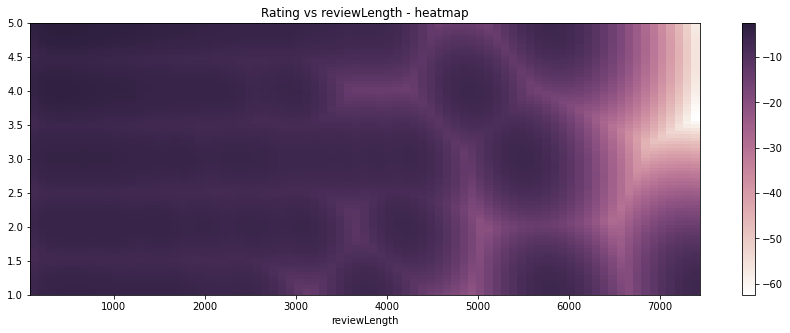

In [374]:
k = gaussian_kde(np.vstack([reviewLength_scores, rating_scores]))
xi, yi = np.mgrid[reviewLength_scores.min():reviewLength_scores.max():reviewLength_scores.size**0.5*1j,rating_scores.min():rating_scores.max():rating_scores.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, (ax1) = plt.subplots(1,1, figsize=(15,5))


b1 = ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(reviewLength_scores.min(), reviewLength_scores.max())
ax1.set_ylim(rating_scores.min(), rating_scores.max())

ax1.set_xlabel('reviewLength')

ax2.set_xlabel('reviewLength')

fig.colorbar(b1, ax=ax1)
ax1.set_title('Rating vs reviewLength - heatmap')

Text(0.5, 1.0, 'vader_scores vs reviewLength - heatmap')

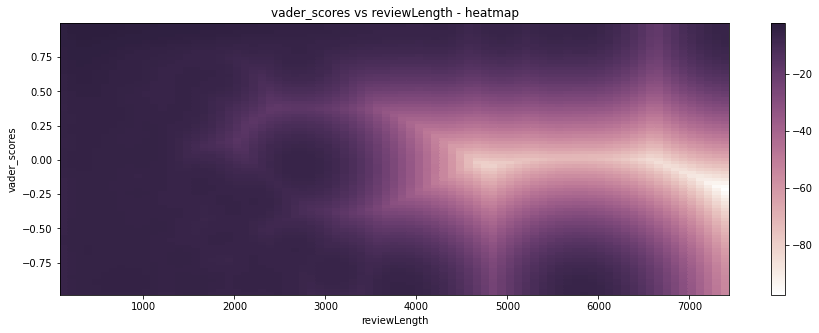

In [375]:
k = gaussian_kde(np.vstack([reviewLength_scores, vader_scores]))
xi, yi = np.mgrid[reviewLength_scores.min():reviewLength_scores.max():reviewLength_scores.size**0.5*1j,vader_scores.min():vader_scores.max():vader_scores.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig, (ax1) = plt.subplots(1,1, figsize=(15,5))


b1 = ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(reviewLength_scores.min(), reviewLength_scores.max())
ax1.set_ylim(vader_scores.min(), vader_scores.max())

ax1.set_xlabel('reviewLength')
ax1.set_ylabel('vader_scores')

fig.colorbar(b1, ax=ax1)
ax1.set_title('vader_scores vs reviewLength - heatmap')

It appears that longer reviews typically occur for most positive reviews. Long reviews are generally very rare, based on the graphs. This is intersting because it shows that customers who had a good time really did want to go into detail about their experience.


It also seems like mediocre reviews are on average short. This makes sense because if nothing was very good or bad, there isn't typically much to talk about in a review. I found this interesting and relatable because if I have an average experience I also feel like my review wouldn't really be helpful for readers, I'd just leave a start rating without text personally. Again, the data is really skewed so there are a lot of positive reviews but from what i can tell, this is the only observation I can conclude. 

##Q5 c) iii)

Text(0.5, 0, 'AverageRatingScore')

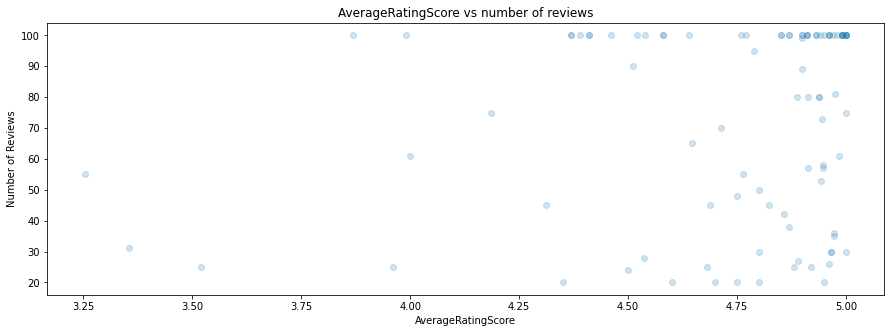

In [377]:
fig, ax = plt.subplots(1,1,figsize=(15,5),sharex=False,sharey=False)
rating_scores = avg_rating_df['n_reviews'].values
reviewLength_scores = avg_rating_df['AverageRatingScore'].values
ax.plot(reviewLength_scores, rating_scores,"o", alpha=0.2)
ax.set_title('AverageRatingScore vs number of reviews')

ax.set_ylabel('Number of Reviews')
ax.set_xlabel('AverageRatingScore')

Text(0.5, 0, 'Average Vader')

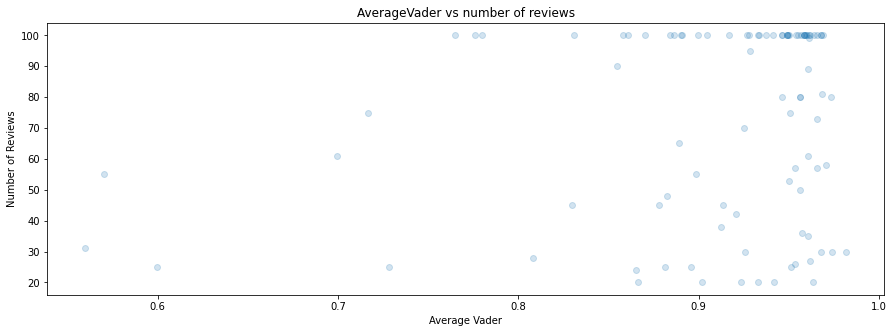

In [378]:
fig, ax = plt.subplots(1,1,figsize=(15,5),sharex=False,sharey=False)
rating_scores = avg_rating_df['n_reviews'].values
reviewLength_scores = avg_rating_df['AverageVader'].values
ax.plot(reviewLength_scores, rating_scores,"o", alpha=0.2)
ax.set_title('AverageVader vs number of reviews')

ax.set_ylabel('Number of Reviews')
ax.set_xlabel('Average Vader')

From the graphs, it appears that a lot of reviews are more common with higher rated hotels. This is intersting because if the hotel really did do an outstanding job you would likely leave a review. Otherwise, you may just want to move on and forget the experience. 

Also, I found it interesting that low rated hotels didn't have a lot of reviews because if you have a particularly bad experience you may feel so strongly about it that you want to review it so others don't visit the hotel. I guess since the low-rated hotels are still not horribly rated (lowest being 0.65) then the experiences were not bad enough to warn other potential visitors.

##Q5 d)

In [74]:
hotelDfFilled = hotelDf
hotelDfFilled['City'] = hotelDfFilled['City'].fillna('Niagara On The Lake')

In [75]:
def make_address(row):
  # individual columns need to be combined
  return row['streetAddress']+", "+row['City']+", "+row['Province']

# Need the location for each hotel in a format the tool can handle

geo_rating_df = avg_rating_df\
                         .join(hotelDfFilled.groupby('hotelName')\
                         .agg({'streetAddress':'max','City':'max','Province':'max','postalCode':'max'}))
geo_rating_df['formed_address'] = geo_rating_df.apply(make_address , axis=1)
geo_rating_df.tail()

,AverageVader,AverageRatingScore,n_reviews,streetAddress,City,Province,postalCode,formed_address
hotelName,,,,,,,,
White Oaks Conference Resort &amp; Spa,0.870113,4.540000,100,253 Taylor Rd,Niagara On The Lake,Ontario,L0S 1J0,"253 Taylor Rd, Niagara On The Lake, Ontario"
Williams Gate Bed and Breakfast Private Suites,0.933672,4.930000,100,413 Gate Street,Niagara On The Lake,Ontario,L0S 1J0,"413 Gate Street, Niagara On The Lake, Ontario"
Wine Country Bed &amp; Breakfast,0.950137,4.970000,100,75 John Street W PO Box 1789,Niagara On The Lake,Ontario,L0S 1J0,"75 John Street W PO Box 1789, Niagara On The Lake, Ontario"
Woodbourne Inn,0.967813,4.960000,100,214 Four Mile Creek Rd.,Niagara On The Lake,Ontario,L0S 1P0,"214 Four Mile Creek Rd., Niagara On The Lake, Ontario"
Yolanta&#39;s B&amp;B,0.961685,4.888889,27,596 Simcoe St,Niagara On The Lake,Ontario,L0S 1J0,"596 Simcoe St, Niagara On The Lake, Ontario"


In [76]:
# 0 - need to give the tool a generic name.
locator = Nominatim(user_agent='myGeocoder')
# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1)
# 2 - form the location string
geo_rating_df['location'] = geo_rating_df['formed_address'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
geo_rating_df['point'] = geo_rating_df['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
geo_rating_df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(geo_rating_df['point'].tolist(), index=geo_rating_df.index)

geo_rating_df.head()

,AverageVader,AverageRatingScore,n_reviews,streetAddress,City,Province,postalCode,formed_address,location,point,latitude,longitude,altitude
hotelName,,,,,,,,,,,,,
124 on Queen Hotel and Spa,0.860997,4.580000,100,124 Queen Street,Niagara On The Lake,Ontario,L0S 1J0,"124 Queen Street, Niagara On The Lake, Ontario","(Niagara-on-the-Lake, Niagara Region, Golden Horseshoe, Ontario, Canada, (43.2556116, -79.0723264))","(43.2556116, -79.0723264, 0.0)",43.255612,-79.072326,0.0
627 on King Bed and Breakfast,0.958632,4.930000,100,627 King Street PO Box 1092,Niagara On The Lake,Ontario,L0S 1J0,"627 King Street PO Box 1092, Niagara On The Lake, Ontario",None,None,NaN,NaN,NaN
A Lil Bit Of Eden,0.967960,4.966667,30,420 Line 2 Bradfield Rd.) RR2,Niagara On The Lake,Ontario,L0S 1J0,"420 Line 2 Bradfield Rd.) RR2, Niagara On The Lake, Ontario",None,None,NaN,NaN,NaN
A Pillow and Toast,0.728136,3.960000,25,8 Garrison Village Dr,Niagara On The Lake,Ontario,L0S 1J0,"8 Garrison Village Dr, Niagara On The Lake, Ontario","(8, Garrison Village Drive, Niagara-on-the-Lake, Niagara Region, Golden Horseshoe, Ontario, L0S 1J0, Canada, (43.25127725, -79.09923942500001))","(43.25127725, -79.09923942500001, 0.0)",43.251277,-79.099239,0.0
Abacot Hall Bed &amp; Breakfast,0.949753,4.980000,100,508 Mississauga Street,Niagara On The Lake,Ontario,L0S 1J0,"508 Mississauga Street, Niagara On The Lake, Ontario",None,None,NaN,NaN,NaN


In [392]:
geo_rating_df = geo_rating_df.round({'AverageRatingScore': 1})

In [ ]:
m = folium.Map([60, 10], tiles='Mapbox Bright', zoom_start=5)
folium.Circle([circle_lat, circle_lon], 150000, fill=True).add_child(folium.Popup('My name is Circle')).add_to(m)
folium.map.Marker(
    [circle_lat + 0.5, circle_lon - 1.6],
    icon=DivIcon(
        icon_size=(150,36),
        icon_anchor=(0,0),
        html='<div style="font-size: 24pt">%s</div>' % text,
        )
    ).add_to(m)
m

In [425]:
map1 = folium.Map(
    location=[43.222296, -79.132129], # <- this will need to be set based on your own hotels
    tiles='cartodbpositron',
    zoom_start=12,
)


text = 'Test'
circle_lat = 60
circle_lon = 10
geo_rating_df.dropna().apply(lambda row:folium.Circle([row["latitude"], row["longitude"]], 200, fill=True).add_to(map1), axis=1)

from folium.features import DivIcon
geo_rating_df.dropna().apply(lambda row:folium.Marker(location=[row["latitude"], row["longitude"]], icon=DivIcon(
        icon_size=(150,36),
        icon_anchor=(7,8),
       html='<div style="font-size: 8pt">%s</div>' % row['AverageRatingScore'],
        )).add_to(map1), axis=1)

map1



In [426]:
## folium graphs are best saved as screenshot images to be reloaded into the notebook
from IPython.display import Image
Image('capture.PNG')

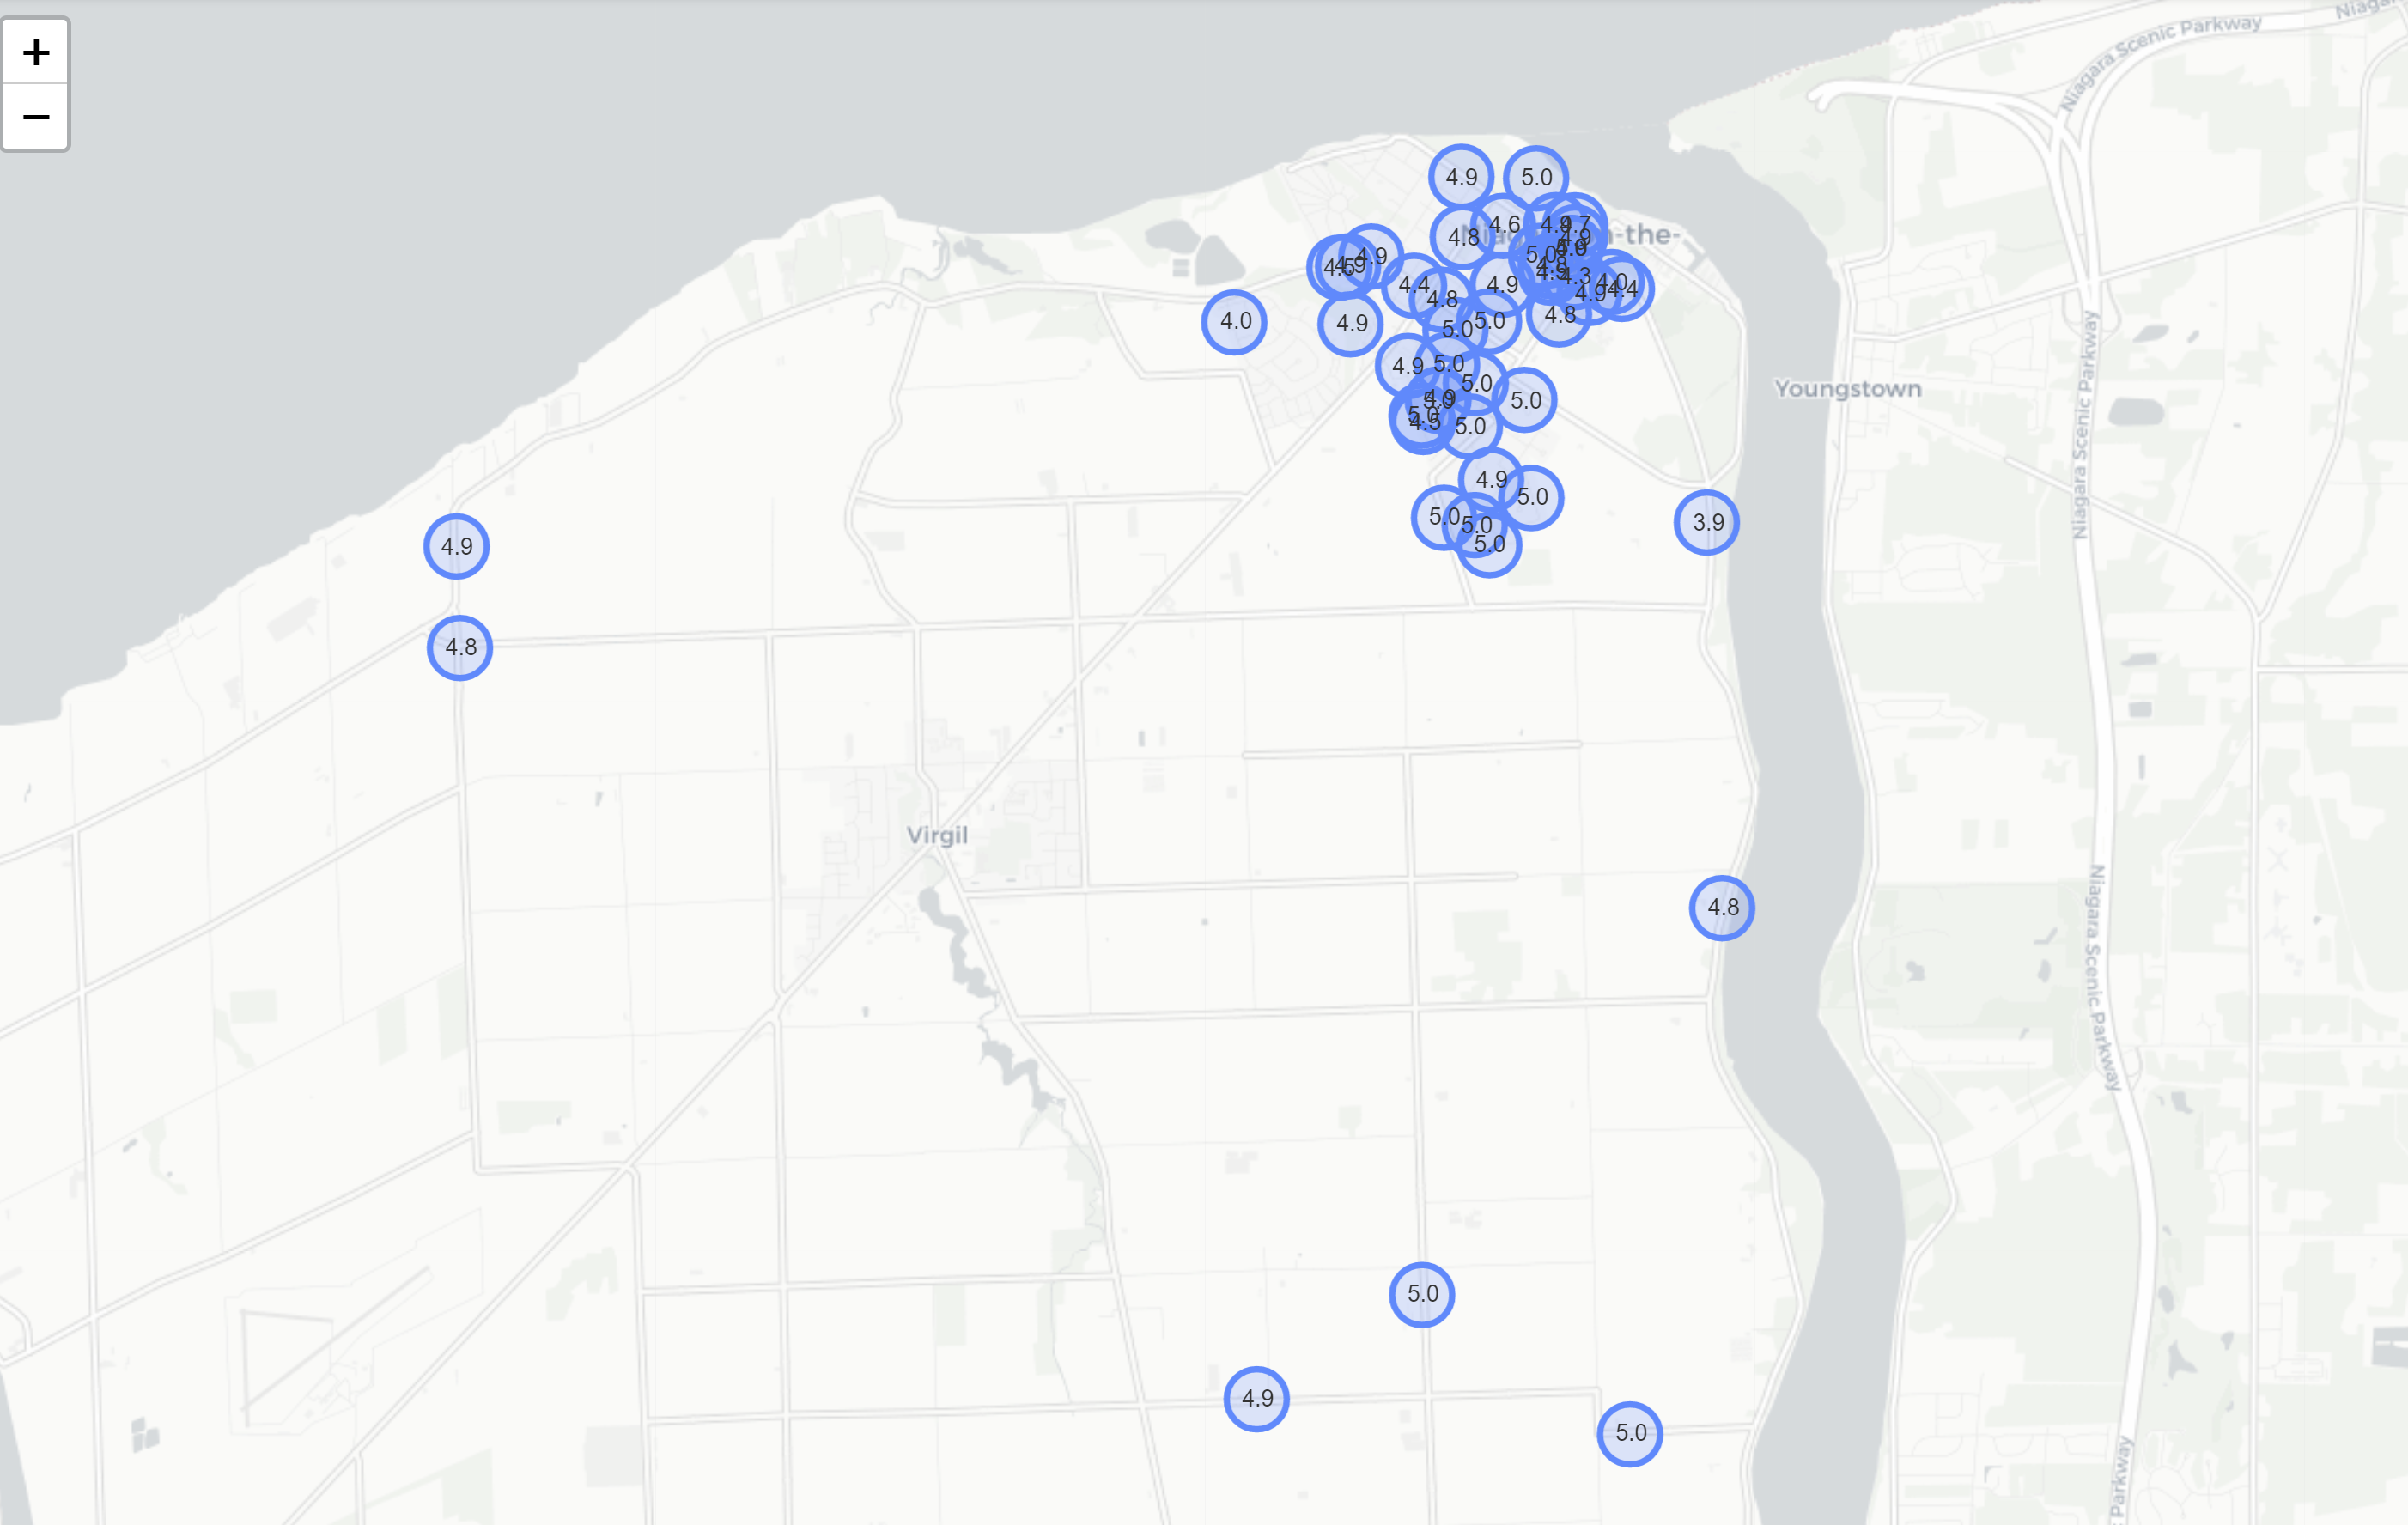

In [428]:
Image('Capture2.PNG')

It doesn't seem like there is a clear area that has better reviews. I wouldn't avoid staying at any particular geolocation

##Q5 e) i)

In [79]:
import datetime
from dateutil.relativedelta import relativedelta
def get_past_date(str_days_ago):
    TODAY = datetime.date.today()
    splitted = str_days_ago.split()
    if len(splitted) == 1 and splitted[0].lower() == 'today':
        return str(TODAY.isoformat())
    elif len(splitted) == 1 and splitted[0].lower() == 'yesterday':
        date = TODAY - relativedelta(days=1)
        return str(date.isoformat())
    elif splitted[1].lower() in ['hour', 'hours', 'hr', 'hrs', 'h']:
        date = datetime.datetime.now() - relativedelta(hours=int(splitted[0]))
        return str(date.date().isoformat())
    elif splitted[1].lower() in ['day', 'days', 'd']:
        date = TODAY - relativedelta(days=int(splitted[0]))
        return str(date.isoformat())
    elif splitted[1].lower() in ['wk', 'wks', 'week', 'weeks', 'w']:
        date = TODAY - relativedelta(weeks=int(splitted[0]))
        return str(date.isoformat())
    elif splitted[1].lower() in ['mon', 'mons', 'month', 'months', 'm']:
        date = TODAY - relativedelta(months=int(splitted[0]))
        return str(date.isoformat())
    elif splitted[1].lower() in ['yrs', 'yr', 'years', 'year', 'y']:
        date = TODAY - relativedelta(years=int(splitted[0]))
        return str(splitted)
    else:
        return pd.to_datetime(str_days_ago)
pd.to_datetime("2020-10-4")

Timestamp('2020-10-04 00:00:00')

In [429]:
avg_rating_df = avg_rating_per_hotel(finaldf)
avgRatingTop = avg_rating_df.reset_index(drop=False)\
                               .sort_values('AverageRatingScore',ascending=False)[['hotelName','AverageRatingScore']]
avgRatingTop

,hotelName,AverageRatingScore
56,On the 6 Bed and Breakfast,5.000000
84,The White House Boutique Bed &amp; Breakfast,5.000000
59,Post House Inn,5.000000
15,Brockamour Manor Bed and Breakfast,5.000000
46,Lakelands Bed and Breakfast,5.000000
...,...,...
3,A Pillow and Toast,3.960000
64,Riverbend Inn and Vineyard,3.870000
45,King George III Inn,3.520000
33,Great Blue Resorts - Vine Ridge Resort Niagara,3.354839


In [442]:
avgRatingTop[43:49]

,hotelName,AverageRatingScore
57,Orchid Inn,4.898990
82,The Red Coat,4.898876
93,Yolanta&#39;s B&amp;B,4.888889
34,Green Oaks B&amp;B,4.887500
20,Cedar Gables Bed and Breakfast,4.880000
47,Lakewinds Country Manor,4.870000


In [444]:
six_hotels = ['On the 6 Bed and Breakfast', 'The White House Boutique Bed &amp; Breakfast', 'Green Oaks B&amp;B', 'Orchid Inn','Great Blue Resorts - Vine Ridge Resort Niagara', 'Residence &amp; Conference Centres - Niagara on the Lake']

In [445]:
hotelDf.loc[hotelDf['hotelName'].isin(six_hotels)].groupby('hotelName')['count'].sum()

hotelName
Great Blue Resorts - Vine Ridge Resort Niagara               31
Green Oaks B&amp;B                                           80
On the 6 Bed and Breakfast                                   75
Orchid Inn                                                   99
Residence &amp; Conference Centres - Niagara on the Lake     55
The White House Boutique Bed &amp; Breakfast                100
Name: count, dtype: int64

In [446]:
six_hotels

['On the 6 Bed and Breakfast',
 'The White House Boutique Bed &amp; Breakfast',
 'Green Oaks B&amp;B',
 'Orchid Inn',
 'Great Blue Resorts - Vine Ridge Resort Niagara',
 'Residence &amp; Conference Centres - Niagara on the Lake']

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


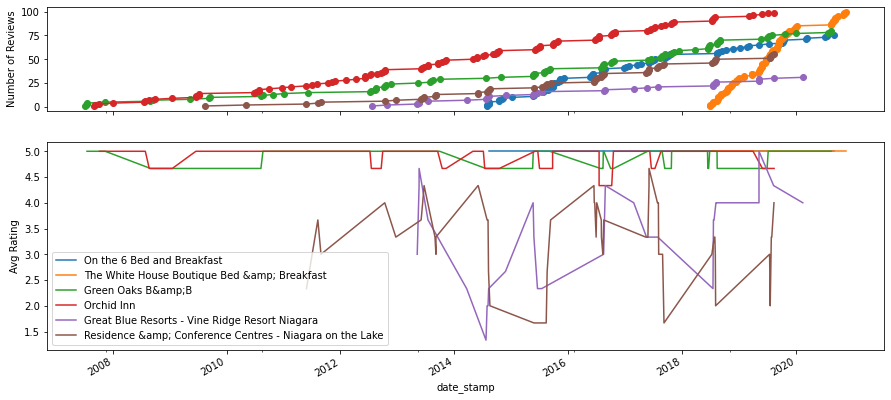

In [447]:
# It can be useful to see when reviews were being made and how the ratings changed using a running mean
fig, ax = plt.subplots(2, 1, figsize=(15,7),
                       sharex=True,
                       gridspec_kw={
                           'height_ratios': [1, 2]})

for hotel in six_hotels: 
  _df = hotelDf[hotelDf['hotelName']==hotel]
  for i in _df.index:
    if 'ago' in _df.loc[i, 'date_stamp']:
      x=get_past_date(_df.loc[i, 'date_stamp'])
      _df.loc[i,'date_stamp']= x
  _df = _df[_df['hotelName']==hotel].set_index('date_stamp')

  _df.index = pd.to_datetime(_df.index)
  _df = _df.sort_index()
  _df['count'] = 1
  _df['count'].cumsum().plot(ax=ax[0],label=hotel, marker='o')
  _df['ratingScore'].rolling(3).mean().plot(ax=ax[1],label=hotel)

ax[1].set_ylabel('Avg Rating')
ax[0].set_ylabel('Number of Reviews')
plt.legend()

The top 2 highly rated hotels (blue and orange) were always consistent and top rated, there isn't a change in avg rating over time. The middle 2 were also always top rated although they have more flucuation recently. The bottom 2 fluctuate a lot. There is no increasing or decreasing trend for the bottom 2. This could mean they aren't really doing anything differently to address their lower rating.

##Q5 e) ii)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


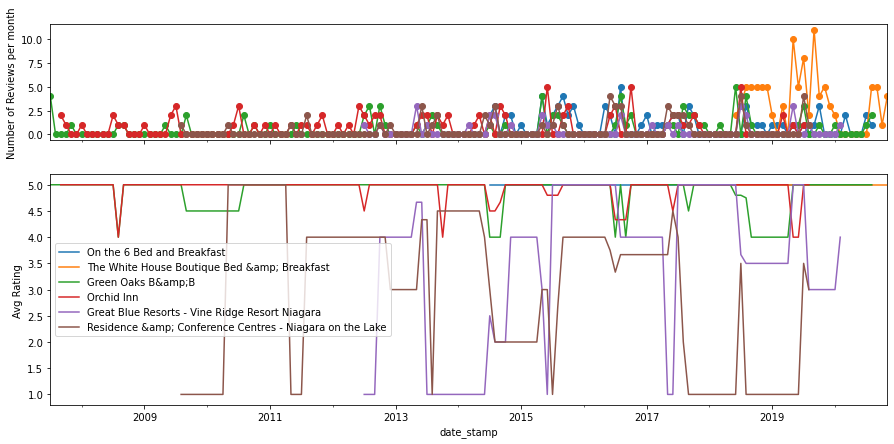

In [450]:
# It can be useful to see when reviews were being made and how the ratings changed
fig, ax = plt.subplots(2, 1, figsize=(15,7),
                       sharex=True,
                       gridspec_kw={
                           'height_ratios': [1, 2]})

for hotel in six_hotels: 
  _df = hotelDf[hotelDf['hotelName']==hotel]
  for i in _df.index:
    if 'ago' in _df.loc[i, 'date_stamp']:
      x=get_past_date(_df.loc[i, 'date_stamp'])
      _df.loc[i,'date_stamp']= x
  _df = _df[_df['hotelName']==hotel].set_index('date_stamp')
  
  _df.index = pd.to_datetime(_df.index)
  _df = _df.sort_index()
  _df['count'] = 1
  _df_monthly = _df.groupby(pd.Grouper(freq='M')).agg({'count':'sum','ratingScore':'mean'})
  _df_monthly['ratingScore'] = _df_monthly['ratingScore'].fillna(method='ffill') # hold the last rating constant in months with no reviews
  _df_monthly['count'].plot(ax=ax[0],label=hotel, marker='o')
  _df_monthly['ratingScore'].plot(ax=ax[1],label=hotel)

ax[1].set_ylabel('Avg Rating')
ax[0].set_ylabel('Number of Reviews per month')
plt.legend()

#Top 2 Hotels

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


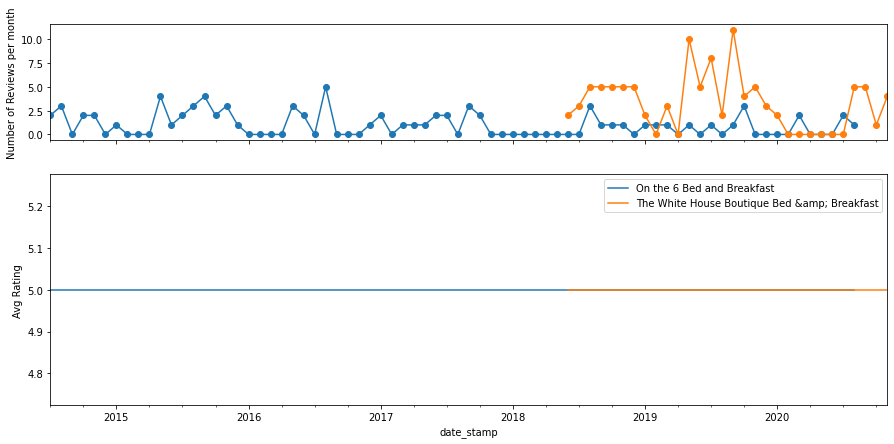

In [451]:
# It can be useful to see when reviews were being made and how the ratings changed
fig, ax = plt.subplots(2, 1, figsize=(15,7),
                       sharex=True,
                       gridspec_kw={
                           'height_ratios': [1, 2]})

for hotel in six_hotels[:2]: 
  _df = hotelDf[hotelDf['hotelName']==hotel]
  for i in _df.index:
    if 'ago' in _df.loc[i, 'date_stamp']:
      x=get_past_date(_df.loc[i, 'date_stamp'])
      _df.loc[i,'date_stamp']= x
  _df = _df[_df['hotelName']==hotel].set_index('date_stamp')
  
  _df.index = pd.to_datetime(_df.index)
  _df = _df.sort_index()
  _df['count'] = 1
  _df_monthly = _df.groupby(pd.Grouper(freq='M')).agg({'count':'sum','ratingScore':'mean'})
  _df_monthly['ratingScore'] = _df_monthly['ratingScore'].fillna(method='ffill') # hold the last rating constant in months with no reviews
  _df_monthly['count'].plot(ax=ax[0],label=hotel, marker='o')
  _df_monthly['ratingScore'].plot(ax=ax[1],label=hotel)

ax[1].set_ylabel('Avg Rating')
ax[0].set_ylabel('Number of Reviews per month')
plt.legend()

These hotels always have perfect reviews so no comments on the trend can be made here

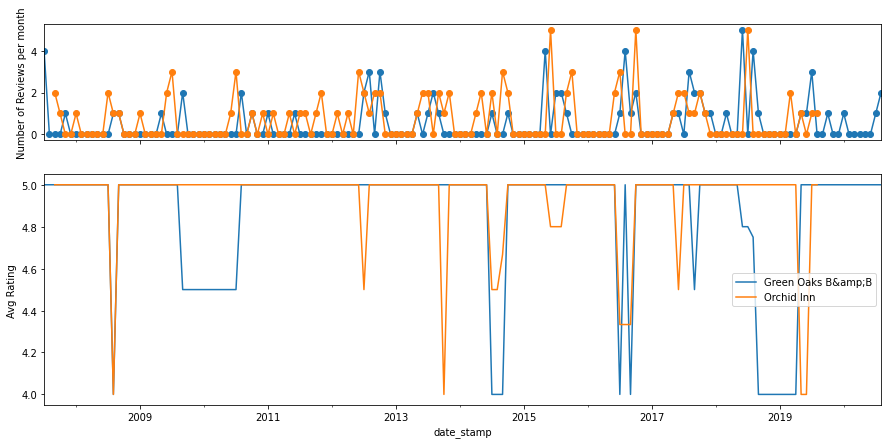

In [453]:
# It can be useful to see when reviews were being made and how the ratings changed
fig, ax = plt.subplots(2, 1, figsize=(15,7),
                       sharex=True,
                       gridspec_kw={
                           'height_ratios': [1, 2]})

for hotel in six_hotels[2:4]: 
  _df = hotelDf[hotelDf['hotelName']==hotel]
  for i in _df.index:
    if 'ago' in _df.loc[i, 'date_stamp']:
      x=get_past_date(_df.loc[i, 'date_stamp'])
      _df.loc[i,'date_stamp']= x
  _df = _df[_df['hotelName']==hotel].set_index('date_stamp')
  
  _df.index = pd.to_datetime(_df.index)
  _df = _df.sort_index()
  _df['count'] = 1
  _df_monthly = _df.groupby(pd.Grouper(freq='M')).agg({'count':'sum','ratingScore':'mean'})
  _df_monthly['ratingScore'] = _df_monthly['ratingScore'].fillna(method='ffill') # hold the last rating constant in months with no reviews
  _df_monthly['count'].plot(ax=ax[0],label=hotel, marker='o')
  _df_monthly['ratingScore'].plot(ax=ax[1],label=hotel)

ax[1].set_ylabel('Avg Rating')
ax[0].set_ylabel('Number of Reviews per month')
plt.legend()

There seems to be a decrease in avg rating whenever there is an increase of reviews that month. This means that maybe these hotels are actually not that great and that comes to light in moths with a lot of reviews. When there is a peak in reviews, there is a large dip in avg rating. A hypothesis for this could be that they are bad at handling a lot of guests at once. 

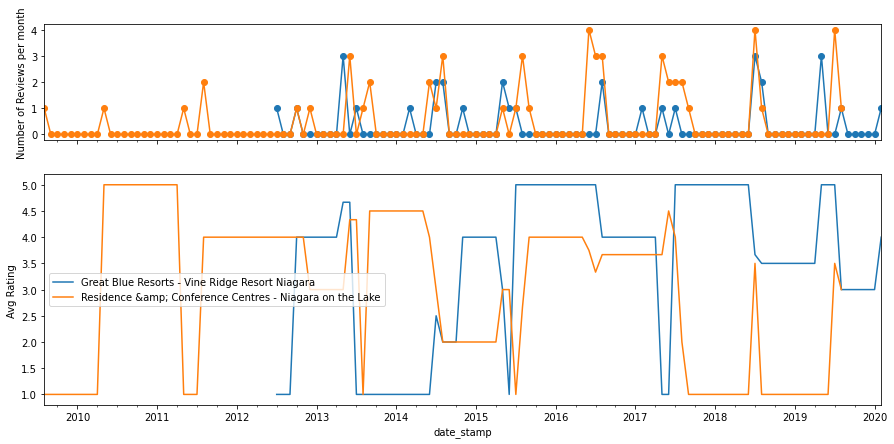

In [456]:
# It can be useful to see when reviews were being made and how the ratings changed
fig, ax = plt.subplots(2, 1, figsize=(15,7),
                       sharex=True,
                       gridspec_kw={
                           'height_ratios': [1, 2]})

for hotel in six_hotels[4:6]: 
  _df = hotelDf[hotelDf['hotelName']==hotel]
  for i in _df.index:
    if 'ago' in _df.loc[i, 'date_stamp']:
      x=get_past_date(_df.loc[i, 'date_stamp'])
      _df.loc[i,'date_stamp']= x
  _df = _df[_df['hotelName']==hotel].set_index('date_stamp')
  
  _df.index = pd.to_datetime(_df.index)
  _df = _df.sort_index()
  _df['count'] = 1
  _df_monthly = _df.groupby(pd.Grouper(freq='M')).agg({'count':'sum','ratingScore':'mean'})
  _df_monthly['ratingScore'] = _df_monthly['ratingScore'].fillna(method='ffill') # hold the last rating constant in months with no reviews
  _df_monthly['count'].plot(ax=ax[0],label=hotel, marker='o')
  _df_monthly['ratingScore'].plot(ax=ax[1],label=hotel)

ax[1].set_ylabel('Avg Rating')
ax[0].set_ylabel('Number of Reviews per month')
plt.legend()

These hotels have opposite trends for their avg rating (when blue is high, orange is low), a hypothesis could be that perhaps they are better in different seasons. Blue seems to do better in the winter months, where as orange seems to have a peak every summer in the past 3 years.del

I found it really difficult to obvserve a clear trend for this question. I think looking at the orginial graph with all 6 hotels, there seem to be a peak in review rates in the middle-end of the year. This is fall and when local vineyards carry out their harvest. I can hypothesize that this might be the best time to visit Niagara-on-the-lake.